# S&DE Atelier - Visual Analytics

# Assignment 1

**Due** April 6, 2023 @23:55 

**Contacts**: marco.dambros@usi.ch - carmen.armenti@usi.ch

---

The goal of this assignment is to use Python and Jupyter notebook to explore, analyze and visualize the datasets provided. To solve the assignment you should apply the knowledge you gained from the theoretical and practical lectures. In particular, when creating tabular or graphical representations you should apply the principles you learned from theoretical lectures and use the technologies presented during practical lectures. For what concerns the visualization library, we suggest to use the library presented in class (Seaborn, Matplotlib, Bokeh), but usage of other libraries (e.g., plotly) is also possible. You should submit a Jyputer notebook (named `SurenameName_Assignment1.ipynb`) that contains your solutions and the steps followed to arrive to these solutions. Please follow the structure of the assignment to solve the exercises.

The datasets you need to use are described in the **Datasets description** section.

In [1]:
from IPython.display import IFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn.datasets import fetch_openml
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, CategoricalColorMapper, Legend, BoxSelectTool, FactorRange, HoverTool, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.layouts import gridplot, column
from bokeh.palettes import Spectral6, Pastel1, Category20c, Inferno256, Reds256
import geopandas as gpd


output_notebook()

Loading BokehJS ...

## Exercise 1 - Data quality (15 points) 🧼

In the Used Cars dataset identify the missing and invalid values for the columns: `vehicle type`, `price`, `brand`, and `month of registration`. If needed, standardize the information and covert them to unique values. Please specify for each column the number of missing or invalid instances. The prices are in euros and the range of accepted prices is between €1'000 and €100'000.
Once you identified missing/invalid values for the given columns, remove all rows where one or more columns have invalid/missing data.
Show the steps that you follow to reach the solution. You can choose your preferred approach/technology to clean the dataset (e.g., Python vanilla, Pandas, OpenRefine). 

In [2]:
! ls -lh used*

-rw-r--r--@ 1 ilariacattaneo  staff    65M Feb 22 11:34 used_cars_dataset.csv


In [3]:
! head "used_cars_dataset.csv"

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,Jeep_Grand_Cherokee_"Overland",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,sk

In [4]:
! wc -l used_cars_dataset.csv

  371825 used_cars_dataset.csv


### Import used_cars_dataset

Importing the csv as it is doesn't work. This is because the dataset is not encoded in UTF-8, hence we import it encoded in Windows-1252.

In [5]:
b'\xdc'.decode('Windows-1252')

'Ü'

In [6]:
usedcars = pd.read_csv('used_cars_dataset.csv', encoding = 'Windows-1252')
usedcars

dateCrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
0       privat   Angebot    480     test         NaN                1993   
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
...        ...       ...    ...      ...         ...                 ...   
371523  privat   Angebot   2200     test         NaN                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
0         manuell        0         golf     150000                    0   
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
...           ...      ...          ...        ...                  ...   
371523        NaN        0          NaN      20000                    1   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType           brand notRepairedDamage          dateCreated  \
0        benzin      volkswagen               NaN  2016-03-24 00:00:00   
1        diesel            audi                ja  2016-03-24 00:00:00   
2        diesel            jeep               NaN  2016-03-14 00:00:00   
3        benzin      volkswagen              nein  2016-03-17 00:00:00   
4        diesel           skoda              nein  2016-03-31 00:00:00   
...         ...             ...               ...                  ...   
371523      NaN  sonstige_autos               NaN  2016-03-14 00:00:00   
371524   benzin           smart              nein  2016-03-05 00:00:00   
371525   diesel      volkswagen              nein  2016-03-19 00:00:00   
371526   diesel      volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin             bmw              nein  2016-03-07 00:00:00   

        nrOfPictures  postalCode             lastSeen  
0                  0       70435  2016-04-07 03:16:57  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
...              ...         ...                  ..

In [7]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [8]:
usedcars.describe(include = 'all')

dateCrawled         name  seller offerType         price  \
count                371528       371528  371528    371528  3.715280e+05   
unique               280500       233531       2         2           NaN   
top     2016-03-24 14:49:47  Ford_Fiesta  privat   Angebot           NaN   
freq                      7          657  371525    371516           NaN   
mean                    NaN          NaN     NaN       NaN  1.729514e+04   
std                     NaN          NaN     NaN       NaN  3.587954e+06   
min                     NaN          NaN     NaN       NaN  0.000000e+00   
25%                     NaN          NaN     NaN       NaN  1.150000e+03   
50%                     NaN          NaN     NaN       NaN  2.950000e+03   
75%                     NaN          NaN     NaN       NaN  7.200000e+03   
max                     NaN          NaN     NaN       NaN  2.147484e+09   

        abtest vehicleType  yearOfRegistration  gearbox        powerPS  \
count   371528      333659       371528.000000   351319  371528.000000   
unique       2           8                 NaN        2            NaN   
top       test   limousine                 NaN  manuell            NaN   
freq    192585       95894                 NaN   274214            NaN   
mean       NaN         NaN         2004.577997      NaN     115.549477   
std        NaN         NaN           92.866598      NaN     192.139578   
min        NaN         NaN         1000.000000      NaN       0.000000   
25%        NaN         NaN         1999.000000      NaN      70.000000   
50%        NaN         NaN         2003.000000      NaN     105.000000   
75%        NaN         NaN         2008.000000      NaN     150.000000   
max        NaN         NaN         9999.000000      NaN   20000.000000   

         model      kilometer  monthOfRegistration fuelType       brand  \
count   351044  371528.000000        371528.000000   338142      371528   
unique     251            NaN                  NaN        7          42   
top       golf            NaN                  NaN   benzin  volkswagen   
freq     30070            NaN                  NaN   223857       79640   
mean       NaN  125618.688228             5.734445      NaN         NaN   
std        NaN   40112.337051             3.712412      NaN         NaN   
min        NaN    5000.000000             0.000000      NaN         NaN   
25%        NaN  125000.000000             3.000000      NaN         NaN   
50%        NaN  150000.000000             6.000000      NaN         NaN   
75%        NaN  150000.000000             9.000000      NaN         NaN   
max        NaN  150000.000000            12.000000      NaN         NaN   

       notRepairedDamage          dateCreated  nrOfPictures    postalCode  \
count             299468               371528      371528.0  371528.00000   
unique                 2                  114           NaN           NaN   
top                 nein  2016-04-03 00:00:00           NaN           NaN   
freq              263182                14450           NaN           NaN   
mean                 NaN                  NaN           0.0   50820.66764   
std                  NaN                  NaN           0.0   25799.08247   
min                  NaN                  NaN           0.0    1067.00000   
25%                  NaN                  NaN           0.0   30459.00000   
50%                  NaN                  NaN           0.0   49610.00000   
75%                  NaN                  NaN           0.0   71546.00000   
max                  NaN                  NaN           0.0   99998.00000   

                   lastSeen  
count                371528  
unique               182806  
top     2016-04-07 06:45:59  
freq                     17  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

### Perform Data Cleaning
Count NaN in vehicleType, price, brand and monthOfRegistration

In [9]:
print('NaN in vehicleType:', usedcars['vehicleType'].isnull().sum())
print('NaN in price:', usedcars['price'].isnull().sum())
print('NaN in brand:', usedcars['brand'].isnull().sum())
print('NaN in monthOfRegistration:', usedcars['monthOfRegistration'].isnull().sum())

NaN in vehicleType: 37869
NaN in price: 0
NaN in brand: 0
NaN in monthOfRegistration: 0


Drop rows that have price less than 1'000 and more than 100'000

In [10]:
lessthan1000 = usedcars[usedcars['price'] < 1000]
morethan100000 = usedcars[usedcars['price'] > 100000]
print(lessthan1000.index)
print(morethan100000.index)

Int64Index([     0,      5,      7,      9,     12,     15,     16,     23,
                24,     29,
            ...
            371464, 371473, 371486, 371492, 371495, 371498, 371499, 371505,
            371514, 371522],
           dtype='int64', length=83335)
Int64Index([   996,   1846,   2735,   4359,   5907,   6409,  10555,  10649,
             13302,  13364,
            ...
            365287, 365461, 366164, 366259, 366653, 366727, 366861, 367041,
            367669, 368656],
           dtype='int64', length=403)


In [11]:
lt_index = lessthan1000.index
mt_index = morethan100000.index

In [12]:
ltdrop = usedcars.drop(lt_index)
cars_noprice = ltdrop.drop(mt_index)
cars_noprice

dateCrawled                                          name  \
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
6       2016-04-01 20:48:51                   Peugeot_206_CC_110_Platinum   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
6       privat   Angebot   2200     test      cabrio                2004   
...        ...       ...    ...      ...         ...                 ...   
371523  privat   Angebot   2200     test         NaN                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
6         manuell      109      2_reihe     150000                    8   
...           ...      ...          ...        ...                  ...   
371523        NaN        0          NaN      20000                    1   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType           brand notRepairedDamage          dateCreated  \
1        diesel            audi                ja  2016-03-24 00:00:00   
2        diesel            jeep               NaN  2016-03-14 00:00:00   
3        benzin      volkswagen              nein  2016-03-17 00:00:00   
4        diesel           skoda              nein  2016-03-31 00:00:00   
6        benzin         peugeot              nein  2016-04-01 00:00:00   
...         ...             ...               ...                  ...   
371523      NaN  sonstige_autos               NaN  2016-03-14 00:00:00   
371524   benzin           smart              nein  2016-03-05 00:00:00   
371525   diesel      volkswagen              nein  2016-03-19 00:00:00   
371526   diesel      volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin             bmw              nein  2016-03-07 00:00:00   

        nrOfPictures  postalCode             lastSeen  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
6                  0       67112  2016-04-05 18:18:39  
...              ...         ...                  ..

Drop rows with NaN in vehicleType, price, brand and monthOfRegistration. We saw before that price, brand and monthOfRegistration has 0 Nan, however to be sure we can drop any NaN value

In [13]:
cars_nonNaN = cars_noprice.dropna(subset = ['vehicleType', 'price', 'brand', 'monthOfRegistration'])
cars_nonNaN

dateCrawled                                          name  \
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
6       2016-04-01 20:48:51                   Peugeot_206_CC_110_Platinum   
...                     ...                                           ...   
371521  2016-03-27 20:36:20            Opel_Zafira_1.6_Elegance_TÜV_12/16   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
6       privat   Angebot   2200     test      cabrio                2004   
...        ...       ...    ...      ...         ...                 ...   
371521  privat   Angebot   1150  control         bus                2000   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
6         manuell      109      2_reihe     150000                    8   
...           ...      ...          ...        ...                  ...   
371521    manuell        0       zafira     150000                    3   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType       brand notRepairedDamage          dateCreated  \
1        diesel        audi                ja  2016-03-24 00:00:00   
2        diesel        jeep               NaN  2016-03-14 00:00:00   
3        benzin  volkswagen              nein  2016-03-17 00:00:00   
4        diesel       skoda              nein  2016-03-31 00:00:00   
6        benzin     peugeot              nein  2016-04-01 00:00:00   
...         ...         ...               ...                  ...   
371521   benzin        opel              nein  2016-03-27 00:00:00   
371524   benzin       smart              nein  2016-03-05 00:00:00   
371525   diesel  volkswagen              nein  2016-03-19 00:00:00   
371526   diesel  volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin         bmw              nein  2016-03-07 00:00:00   

        nrOfPictures  postalCode             lastSeen  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
6                  0       67112  2016-04-05 18:18:39  
...              ...         ...                  ...  
371521             0       26624  2016-03-29

In [14]:
cars_nonNaN.describe(include = 'all')

dateCrawled      name  seller offerType          price  \
count                267145    267145  267145    267145  267145.000000   
unique               218285    160517       2         2            NaN   
top     2016-03-05 14:25:23  BMW_318i  privat   Angebot            NaN   
freq                      5       561  267143    267144            NaN   
mean                    NaN       NaN     NaN       NaN    7285.942166   
std                     NaN       NaN     NaN       NaN    8064.908187   
min                     NaN       NaN     NaN       NaN    1000.000000   
25%                     NaN       NaN     NaN       NaN    2290.000000   
50%                     NaN       NaN     NaN       NaN    4500.000000   
75%                     NaN       NaN     NaN       NaN    9200.000000   
max                     NaN       NaN     NaN       NaN  100000.000000   

        abtest vehicleType  yearOfRegistration  gearbox        powerPS  \
count   267145      267145       267145.000000   260353  267145.000000   
unique       2           8                 NaN        2            NaN   
top       test   limousine                 NaN  manuell            NaN   
freq    138659       78586                 NaN   193588            NaN   
mean       NaN         NaN         2003.802560      NaN     130.350922   
std        NaN         NaN            6.833239      NaN     190.823484   
min        NaN         NaN         1910.000000      NaN       0.000000   
25%        NaN         NaN         2001.000000      NaN      84.000000   
50%        NaN         NaN         2004.000000      NaN     120.000000   
75%        NaN         NaN         2008.000000      NaN     163.000000   
max        NaN         NaN         2018.000000      NaN   20000.000000   

         model      kilometer  monthOfRegistration fuelType       brand  \
count   258280  267145.000000        267145.000000   257843      267145   
unique     251            NaN                  NaN        7          42   
top       golf            NaN                  NaN   benzin  volkswagen   
freq     20683            NaN                  NaN   155612       56114   
mean       NaN  122364.652155             6.134740      NaN         NaN   
std        NaN   40791.616820             3.528119      NaN         NaN   
min        NaN    5000.000000             0.000000      NaN         NaN   
25%        NaN  100000.000000             3.000000      NaN         NaN   
50%        NaN  150000.000000             6.000000      NaN         NaN   
75%        NaN  150000.000000             9.000000      NaN         NaN   
max        NaN  150000.000000            12.000000      NaN         NaN   

       notRepairedDamage          dateCreated  nrOfPictures     postalCode  \
count             234454               267145      267145.0  267145.000000   
unique                 2                  109           NaN            NaN   
top                 nein  2016-04-03 00:00:00           NaN            NaN   
freq              218458                10766           NaN            NaN   
mean                 NaN                  NaN           0.0   51857.899467   
std                  NaN                  NaN           0.0   25718.980501   
min                  NaN                  NaN           0.0    1067.000000   
25%                  NaN                  NaN           0.0   31319.000000   
50%                  NaN                  NaN           0.0   51065.000000   
75%                  NaN                  NaN           0.0   72658.000000   
max                  NaN                  NaN           0.0   99998.000000   

                   lastSeen  
count                267145  
unique               136105  
top     2016-04-07 07:17:35  
freq                     16  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

Filter rows that have monthOfRegistration different from 0

In [15]:
cars_nonNaN = cars_nonNaN[cars_nonNaN.monthOfRegistration != 0]
cars_nonNaN

dateCrawled                                          name  \
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
6       2016-04-01 20:48:51                   Peugeot_206_CC_110_Platinum   
...                     ...                                           ...   
371521  2016-03-27 20:36:20            Opel_Zafira_1.6_Elegance_TÜV_12/16   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
6       privat   Angebot   2200     test      cabrio                2004   
...        ...       ...    ...      ...         ...                 ...   
371521  privat   Angebot   1150  control         bus                2000   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
6         manuell      109      2_reihe     150000                    8   
...           ...      ...          ...        ...                  ...   
371521    manuell        0       zafira     150000                    3   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType       brand notRepairedDamage          dateCreated  \
1        diesel        audi                ja  2016-03-24 00:00:00   
2        diesel        jeep               NaN  2016-03-14 00:00:00   
3        benzin  volkswagen              nein  2016-03-17 00:00:00   
4        diesel       skoda              nein  2016-03-31 00:00:00   
6        benzin     peugeot              nein  2016-04-01 00:00:00   
...         ...         ...               ...                  ...   
371521   benzin        opel              nein  2016-03-27 00:00:00   
371524   benzin       smart              nein  2016-03-05 00:00:00   
371525   diesel  volkswagen              nein  2016-03-19 00:00:00   
371526   diesel  volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin         bmw              nein  2016-03-07 00:00:00   

        nrOfPictures  postalCode             lastSeen  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
6                  0       67112  2016-04-05 18:18:39  
...              ...         ...                  ...  
371521             0       26624  2016-03-29

Clean white spaces and put every brand in lowercase

In [16]:
cars_nonNaN['brand'] = cars_nonNaN['brand'].str.strip()
cars_nonNaN['brand'] = cars_nonNaN['brand'].apply(str.lower)
print(np.unique(cars_nonNaN.brand))
cars_nonNaN

['alfa_romeo' 'audi' 'bmw' 'chevrolet' 'chrysler' 'citroen' 'dacia'
 'daewoo' 'daihatsu' 'fiat' 'ford' 'honda' 'hyundai' 'jaguar' 'jeep' 'kia'
 'lada' 'lancia' 'land_rover' 'mazda' 'mercedes_benz' 'mini' 'mitsubishi'
 'nissan' 'opel' 'peugeot' 'porsche' 'renault' 'rover' 'saab' 'seat'
 'skoda' 'smart' 'sonstige_autos' 'subaru' 'suzuki' 'toyota' 'trabant'
 'volkswagen' 'volvo']


/var/folders/xg/r98plty141z73zd2wj72t2tc0000gn/T/ipykernel_46838/2699663218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_nonNaN['brand'] = cars_nonNaN['brand'].str.strip()
/var/folders/xg/r98plty141z73zd2wj72t2tc0000gn/T/ipykernel_46838/2699663218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_nonNaN['brand'] = cars_nonNaN['brand'].apply(str.lower)


dateCrawled                                          name  \
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
6       2016-04-01 20:48:51                   Peugeot_206_CC_110_Platinum   
...                     ...                                           ...   
371521  2016-03-27 20:36:20            Opel_Zafira_1.6_Elegance_TÜV_12/16   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
6       privat   Angebot   2200     test      cabrio                2004   
...        ...       ...    ...      ...         ...                 ...   
371521  privat   Angebot   1150  control         bus                2000   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
6         manuell      109      2_reihe     150000                    8   
...           ...      ...          ...        ...                  ...   
371521    manuell        0       zafira     150000                    3   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType       brand notRepairedDamage          dateCreated  \
1        diesel        audi                ja  2016-03-24 00:00:00   
2        diesel        jeep               NaN  2016-03-14 00:00:00   
3        benzin  volkswagen              nein  2016-03-17 00:00:00   
4        diesel       skoda              nein  2016-03-31 00:00:00   
6        benzin     peugeot              nein  2016-04-01 00:00:00   
...         ...         ...               ...                  ...   
371521   benzin        opel              nein  2016-03-27 00:00:00   
371524   benzin       smart              nein  2016-03-05 00:00:00   
371525   diesel  volkswagen              nein  2016-03-19 00:00:00   
371526   diesel  volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin         bmw              nein  2016-03-07 00:00:00   

        nrOfPictures  postalCode             lastSeen  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
6                  0       67112  2016-04-05 18:18:39  
...              ...         ...                  ...  
371521             0       26624  2016-03-29

## Exercise 2 - Data analysis (20 points) 📊

1. We consider the norm to be that, for a given type of vehicle, on average the price of diesel is greater than the one of benzine. Provide a representation of the data which shows if, and to which extent, the various vehicle types conform to the norm.
What relationship are you showing? Please justify the choice of the representation and your answer.
2. Find an appropriate way to show and compare the range of prices for the following `brand`: **mercedes_benz**, **fiat**, **volvo**, **alfa_romeo** and **lancia**. Create a suitable graphical representation of this data. What kind of relationship are you showing? Describe what can be understood from the plot. Please justify your answer and your choice of the graphical representation.

<aside>
💡 N.B. In this section you should work on the clean Used Cars dataset, without the missing and invalid data.

</aside>

### Part 1

We first take the columns that we're interested in and then we filter for rows that have fuelType of diesel and benzin; after that we make a pivot table and a bar chart to represent data

In [17]:
uvehicletypes = np.unique(cars_nonNaN.vehicleType)
uvehicletypes

array(['andere', 'bus', 'cabrio', 'coupe', 'kleinwagen', 'kombi',
       'limousine', 'suv'], dtype=object)

In [18]:
cars_db = cars_nonNaN[['name', 'vehicleType', 'yearOfRegistration', 'model', 'monthOfRegistration', 'fuelType', 'brand', 'price']]
cars_db = cars_db.loc[cars_db['fuelType'].isin(['diesel', 'benzin'])]
cars_db

name vehicleType  \
1                               A5_Sportback_2.7_Tdi       coupe   
2                     Jeep_Grand_Cherokee_"Overland"         suv   
3                                 GOLF_4_1_4__3TÜRER  kleinwagen   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  kleinwagen   
6                        Peugeot_206_CC_110_Platinum      cabrio   
...                                              ...         ...   
371521            Opel_Zafira_1.6_Elegance_TÜV_12/16         bus   
371524         Smart_smart_leistungssteigerung_100ps      cabrio   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2         bus   
371526                        VW_Golf_Kombi_1_9l_TDI       kombi   
371527  BMW_M135i_vollausgestattet_NP_52.720____Euro   limousine   

        yearOfRegistration        model  monthOfRegistration fuelType  \
1                     2011          NaN                    5   diesel   
2                     2004        grand                    8   diesel   
3                     2001         golf                    6   benzin   
4                     2008        fabia                    7   diesel   
6                     2004      2_reihe                    8   benzin   
...                    ...          ...                  ...      ...   
371521                2000       zafira                    3   benzin   
371524                2000       fortwo                    3   benzin   
371525                1996  transporter                    3   diesel   
371526                2002         golf                    6   diesel   
371527                2013      m_reihe                    8   benzin   

             brand  price  
1             audi  18300  
2             jeep   9800  
3       volkswagen   1500  
4            skoda   3600  
6          peugeot   2200  
...            ...    ...  
371521        opel   1150  
371524       smart   1199  
371525  volkswagen   9200  
371526  volkswagen   3400  
371527         bmw  28990  

[243605 rows x 8 columns]

In [19]:
andere = cars_db.loc[cars_db['vehicleType'].isin(['andere'])]
andere

name vehicleType  \
38      Abschleppwagen_Vw_LT_195.000_gruene_Plakette_T...      andere   
77                            MB_Vito_Transporter_108_CDI      andere   
427            Alfa_Giulietta_2.0_JTDm_mit_QV_Ausstattung      andere   
448     CITREON_JUMPER_2_2_2010_LKW__KASTEN_HOCH_UND_L...      andere   
499                             Expert_Kasten_geschlossen      andere   
...                                                   ...         ...   
370579  Renault_Espace_IV__Diesel__gr._Pl._Sehr_sauber...      andere   
370956                                         Fiat_Stilo      andere   
371044        Verkaufe_VW_T3_Doka_mit_TÜV_Neu_EX_BW_Bulli      andere   
371098                  Mercedes_benz_vito_Transporter!!!      andere   
371438              Peugeot_3008_VTI_120_Premium_Panorama      andere   

        yearOfRegistration        model  monthOfRegistration fuelType  \
38                    2002       andere                   11   diesel   
77                    2003         vito                    8   diesel   
427                   2011          NaN                   11   diesel   
448                   2010       andere                    7   diesel   
499                   2008       andere                    3   diesel   
...                    ...          ...                  ...      ...   
370579                2005       espace                    7   diesel   
370956                2004        stilo                    5   benzin   
371044                1989  transporter                   11   diesel   
371098                1998         vito                   10   diesel   
371438                2009      3_reihe                   12   benzin   

                brand  price  
38         volkswagen  11900  
77      mercedes_benz   1400  
427        alfa_romeo  13950  
448           citroen   5500  
499           peugeot   4760  
...               ...    ...  
370579        renault   2950  
370956           fiat   1500  
371044     volkswagen   2999  
371098  mercedes_benz   2399  
371438        peugeot   7500  

[1916 rows x 8 columns]

In [20]:
fueltcap = cars_db.fuelType.str.capitalize()
vehicletcap = cars_db.vehicleType.str.capitalize()
pd.pivot_table(cars_db, values = 'price', 
                                index = vehicletcap, 
                                columns = fueltcap, 
                                aggfunc = np.mean)

fuelType           Benzin        Diesel
vehicleType                            
Andere        5641.296117   5571.089744
Bus           5748.519753   8198.861909
Cabrio       10626.006778  13412.914459
Coupe        11492.059403  15332.008891
Kleinwagen    3923.169212   4818.085626
Kombi         5571.508269   7981.154898
Limousine     5907.006581   9499.870136
Suv          10384.563336  15895.784387

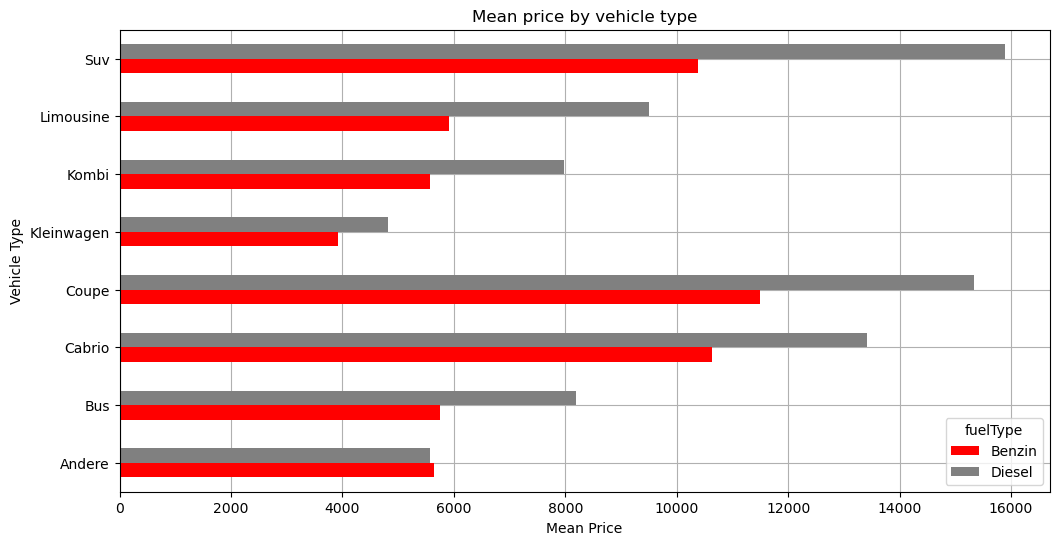

In [21]:
color = ['#FF0000', '#808080']
barchart = pd.pivot_table(cars_db, values = 'price', 
                                index = vehicletcap, 
                                columns = fueltcap, 
                                aggfunc = np.mean).plot.barh(figsize = (12,6), 
                                                           title = 'Mean price by vehicle type', 
                                                           legend = True, 
                                                           color = color, 
                                                           zorder = 2);
plt.grid(True);
plt.ylabel('Vehicle Type');
plt.xlabel('Mean Price');

With this horizontal bar chart, we are showing a categorical relationship, as we have 2 categorical variables (vehicle type and fuel type) and 1 quantitative variable (price). The horizontal bar chart allows a better visualization of comparisons and also it's very helpful in displaying long labels, because they don't overlap with themselves.
We want to show that in general the mean price of diesel cars is greater than the mean price of benzin cars, for each vehicle type. We see that the mean price of benzin cars of the "andere" vehicle type category is slightly higher than the mean price of diesel cars; however, the vehicle type category "andere" contains several non-identified cars which belong to different models, therefore reading at the "andere" vehicle type category as it is could be misleading.

### Part 2

Now we want to compare prices of diesel and benzin vehicles for each brand, and to do so we make a boxplot

In [22]:
cars_db = cars_db.replace(to_replace = 'mercedes_benz', value = 'Mercedes Benz')
cars_db = cars_db.replace(to_replace = 'fiat', value = 'Fiat')
cars_db = cars_db.replace(to_replace = 'volvo', value = 'Volvo')
cars_db = cars_db.replace(to_replace = 'alfa_romeo', value = 'Alfa Romeo')
cars_db = cars_db.replace(to_replace = 'lancia', value = 'Lancia')

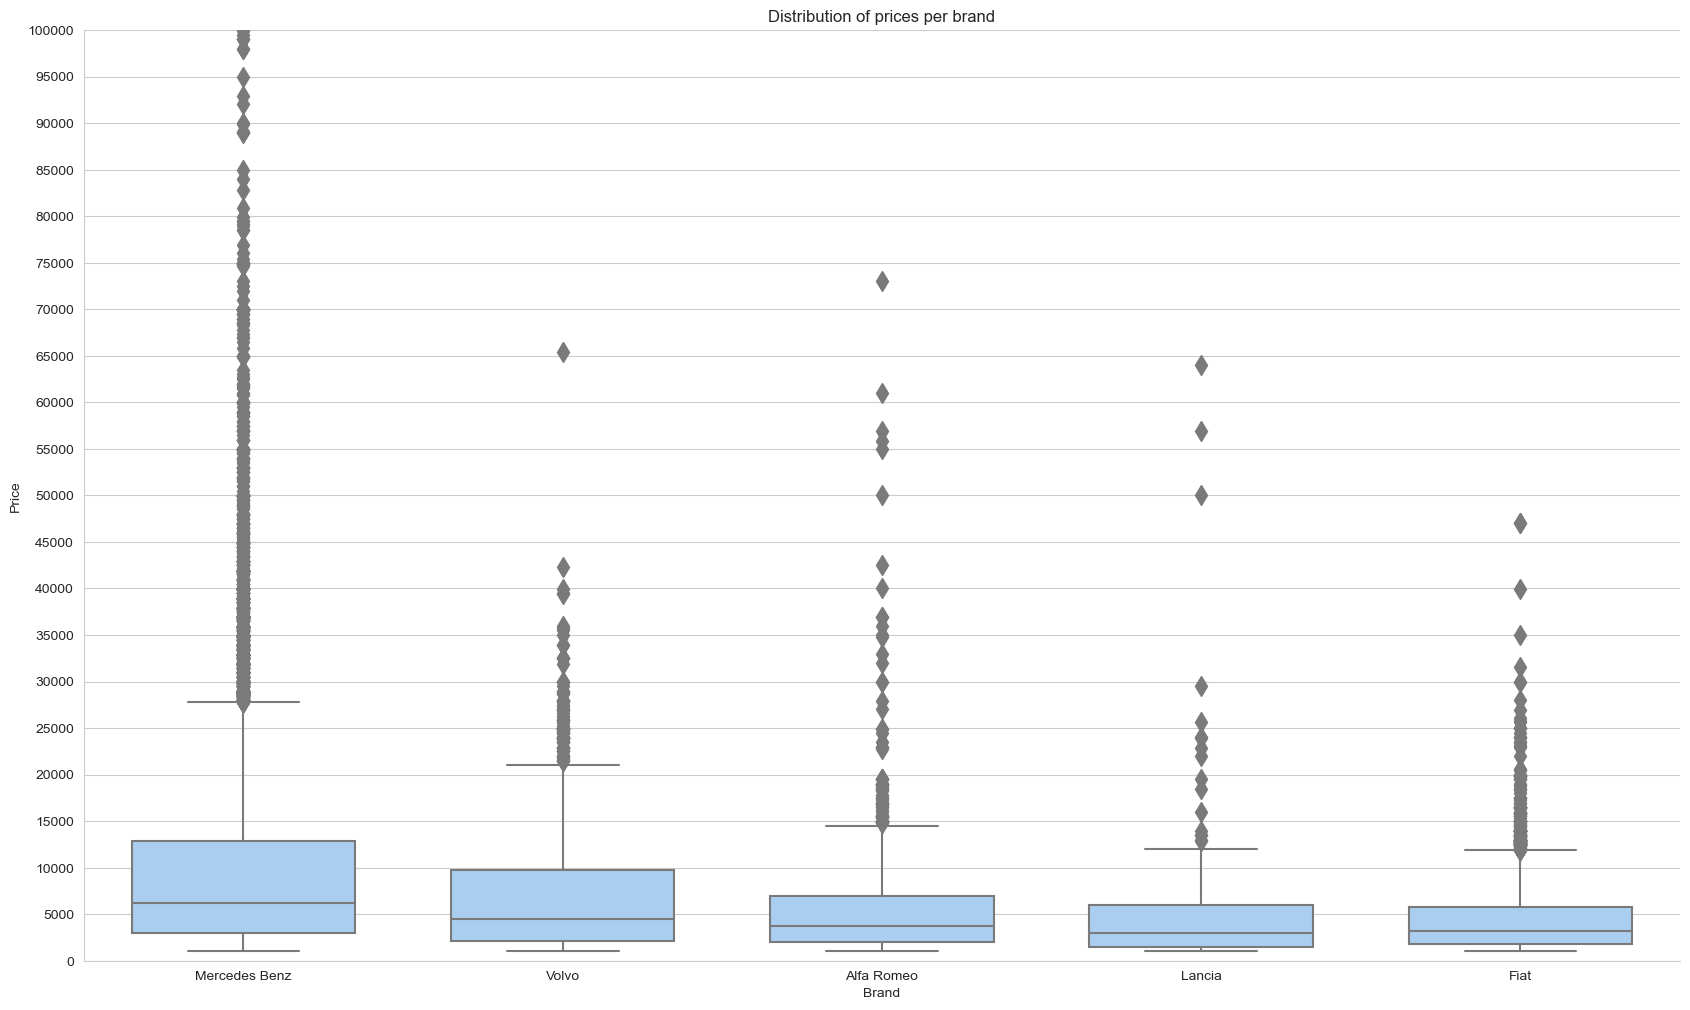

In [23]:
sns.set_style('whitegrid')
sns.catplot(data = cars_db.loc[cars_db['brand'].isin(['Mercedes Benz', 'Fiat', 'Volvo', 'Alfa Romeo', 'Lancia'])], 
            x = 'brand', 
            y = 'price', 
            kind = 'box',
            orient = 'vertical',
            aspect = 1.7, 
            fliersize = 10, 
            width = 0.7, 
            height = 10, 
            color = '#9ECFFA');
plt.title('Distribution of prices per brand');
plt.xlabel('Brand');
plt.ylabel('Price');
plt.ylim(bottom = 0);
plt.yticks(np.arange(0, 105000, 5000));
plt.xticks(rotation = 0);
plt.ylim(0, 100000);

With this plot we are representing a comparison between a categorical variable (brand) and a quantitative variable (price).
The box plot allows us to represent a comparison between a range of values, not only indicating the minimum and the maximum values, but also quartiles and outliers.
Looking at the graph, we can see that the minimum price is quite the same for all brands, but then we see that Mercedes Benz has a higher mean and maximum values in comparison to the other brands analysed. the maximum value of Volvo is quite distant from Mercedes Benz and there are less outliers. In addition, Fiat Lancia and Alfa Romeo are very similar in theie values.
What can be underlined is that we are comparing cars from different market targets and different pricing strategies, and this could be misleading. Better explaining, Mercedes Benz is a brand mainly offered to a range of the population that has a higher income and can afford a car of that brand, same as for Volvo and Alfa Romeo that belong to the middle-high range of population, while Fiat and Lancia are cheaper brands offered to a wider range of population. 
Furthermore, as outliers represent prices outside the range, we could say that represent cars that are bought and then sold again in a second-hand market or they are simply cars with many optionals that make the price of cars fly high; this is only an assumption because more information and a more detailed and deeper analysis of the dataset are needed.




## Exercise 3 - Data analysis (20 points) 📊

The following graph represents the financial meltdown's impact on banks since the 2008 financial crisis began, and compares the market value of each bank as of 2007 - in blue - and 2009 - in green. The **main** purpose of the graph is to show the loss of each bank after the financial crisis and to enlight the little decline pre-versus-post meltdown of J.P. Morgan; the **secondary** purpose is to provide a sense of the relative sizes of the banks in terms of market value (e.g., J.P. Morgan is not a small bank).
Is there a better solution to achieve these two goals? How would you compare both the remaining market value of each bank after the loss caused by the crisis and their decline?

List all the problems that you detect in the design of this graph with respect to the quantive message the graph is supposed to deliver.

Propose and implement a different graph that delivers effectively the message.

Use the data in the ‘*market_value_decline’* dataset to populate the new graph.

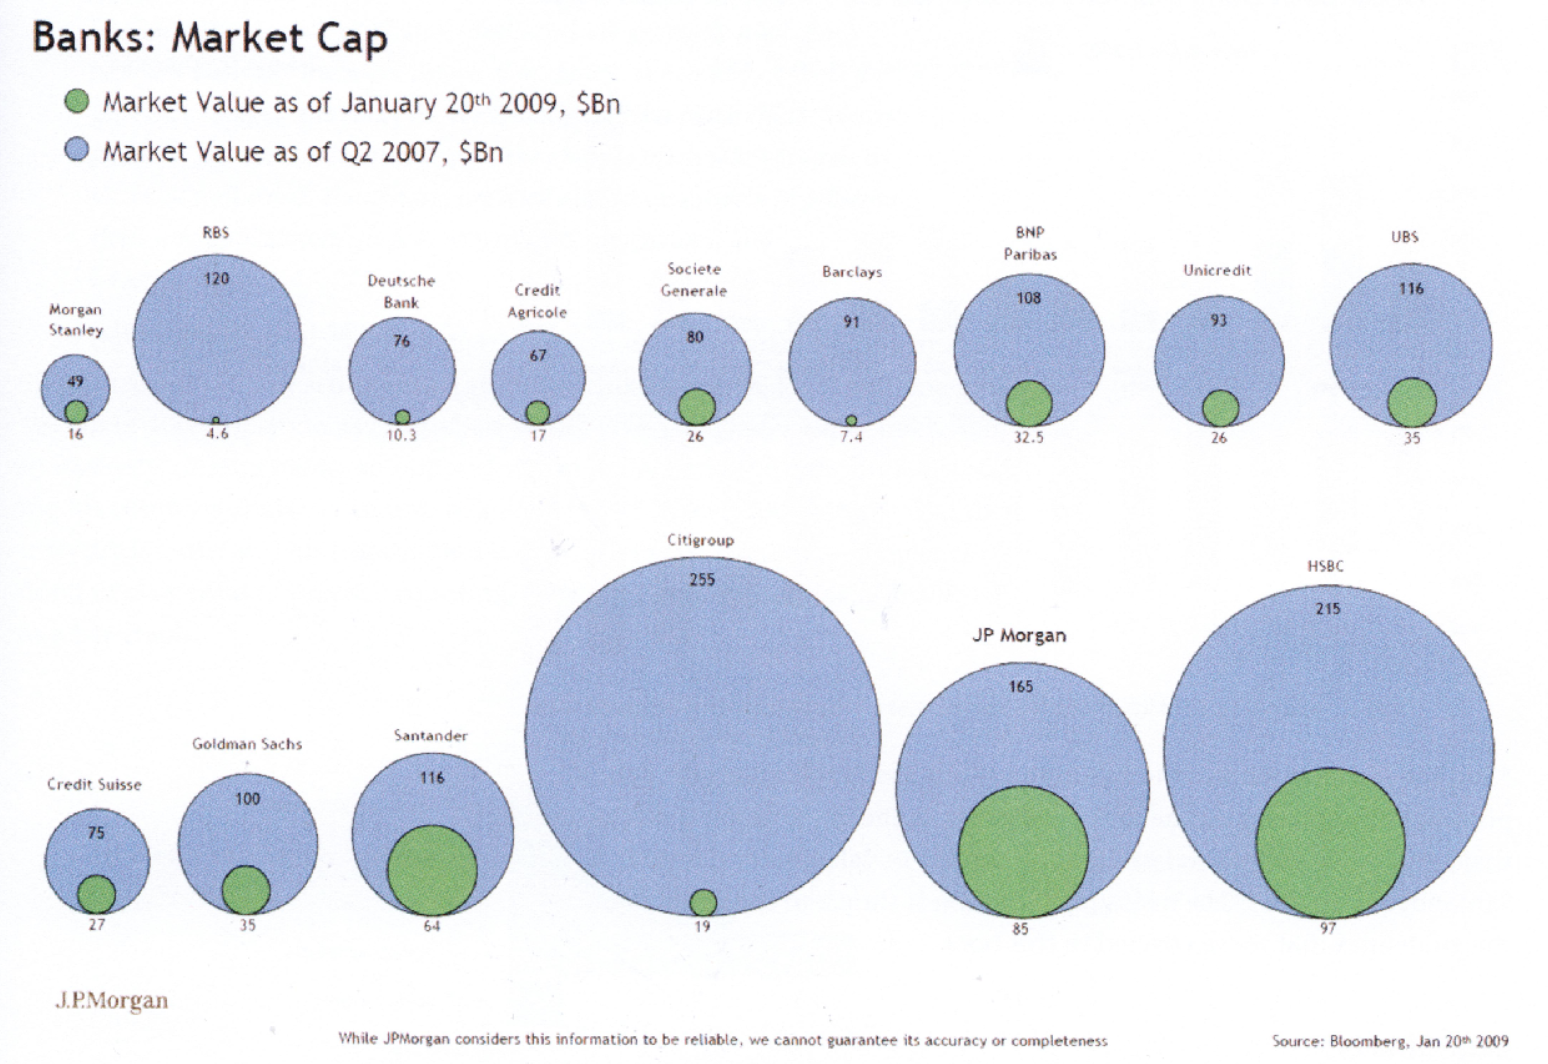

Generally speaking at business level, the bubble chart is used to represent a comparison of 3 variables, for example the market share of companies in relation to their revenues and percentage of return on investments (ROI); this kind of graph in that context is usually plotted on a plane with axes and the companies are positioned above or below an average depending on the attractiveness.

In this context, the aim of the bubble graph is to show the loss of market share between 2007 and 2009, highlighting JP Morgan, and then to represent the relative size of banks in terms of market value.
However, the bubble chart as it is represented above is not explicative enough and combines too many messages in the same graph, causing misleading conclusion. Sizes are different to distinguish when similar to each other and also smaller sizes are difficult to spot. Also, there are no units of measurment and values are not plotted on a plane chart, that would have delined an order of the banks.

To be sure that the 2 messages arrive cristal clear to the reader of the chart, the bubble graph above is not suitable; it's better to use a bar chart comparing the market value by bank, because it allows a better visualization of each market share value of each bank and the loss given by the distance between the bar of 2007 and the bar of 2009.

### Import dataset and quick data check

For semplicity, directly in the csv file, we added name of banks as header title to the column displaying banks

In [24]:
! ls -lh market*

-rw-r--r--@ 1 ilariacattaneo  staff   336B Mar 23 08:41 market_value_decline.csv


In [25]:
! head "market_value_decline.csv"

bank_name,market_value_2007,market_value_2009
Morgan Stanley,49,16.0
RBS,120,4.6
Deutsche Bank,76,10.3
Credit Agricole,67,17.0
Societe Generale,80,26.0
Barclays,91,7.4
BNP Paribas,108,32.5
Unicredit,93,26.0
UBS,116,35.0


In [26]:
! wc -l market_value_decline.csv

      16 market_value_decline.csv


In [27]:
market_value_decline = pd.read_csv('market_value_decline.csv')
print(len(market_value_decline.values))
market_value_decline

15


bank_name  market_value_2007  market_value_2009
0     Morgan Stanley                 49               16.0
1                RBS                120                4.6
2      Deutsche Bank                 76               10.3
3    Credit Agricole                 67               17.0
4   Societe Generale                 80               26.0
5           Barclays                 91                7.4
6        BNP Paribas                108               32.5
7          Unicredit                 93               26.0
8                UBS                116               35.0
9      Credit Suisse                 75               27.0
10     Goldman Sachs                100               35.0
11         Santander                116               64.0
12         Citigroup                255               19.0
13         JP Morgan                165               85.0
14              HSBC                215               97.0

In [28]:
market_value_decline = market_value_decline.iloc[([13] + [i for i in range(len(market_value_decline)) if i != 13])]
market_value_decline

bank_name  market_value_2007  market_value_2009
13         JP Morgan                165               85.0
0     Morgan Stanley                 49               16.0
1                RBS                120                4.6
2      Deutsche Bank                 76               10.3
3    Credit Agricole                 67               17.0
4   Societe Generale                 80               26.0
5           Barclays                 91                7.4
6        BNP Paribas                108               32.5
7          Unicredit                 93               26.0
8                UBS                116               35.0
9      Credit Suisse                 75               27.0
10     Goldman Sachs                100               35.0
11         Santander                116               64.0
12         Citigroup                255               19.0
14              HSBC                215               97.0

In [29]:
market_value_decline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 13 to 14
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bank_name          15 non-null     object 
 1   market_value_2007  15 non-null     int64  
 2   market_value_2009  15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 480.0+ bytes


In [30]:
print('NaN in market_value_2007:', market_value_decline['market_value_2007'].isnull().sum())
print('NaN in market_value_2009:', market_value_decline['market_value_2009'].isnull().sum())

NaN in market_value_2007: 0
NaN in market_value_2009: 0


In [31]:
bank_names = np.unique(market_value_decline['bank_name'])
bank_names

array(['BNP Paribas', 'Barclays', 'Citigroup', 'Credit Agricole',
       'Credit Suisse', 'Deutsche Bank', 'Goldman Sachs', 'HSBC',
       'JP Morgan', 'Morgan Stanley', 'RBS', 'Santander',
       'Societe Generale', 'UBS', 'Unicredit'], dtype=object)

After checking out the dataset, we make a bar chart to represent the market value decline of each bank, by comparing market value in 2007 and 2009

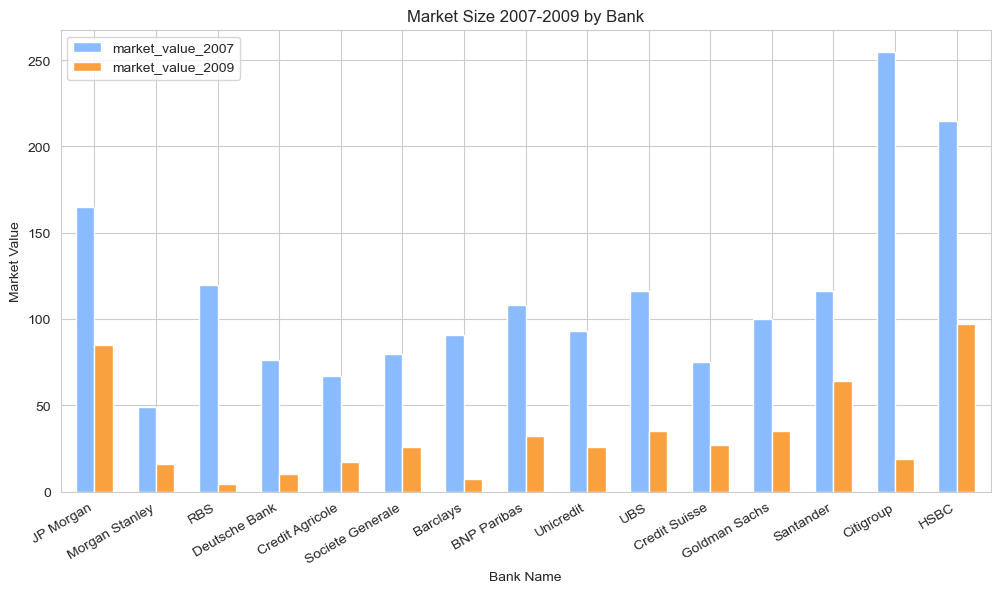

In [32]:
color = ['#89BBFE', '#F9A03F']
barmvd = market_value_decline.plot.bar(x = 'bank_name', figsize = (12,6), width = 0.6, title = 'Market Size 2007-2009 by Bank', legend = True, color = color, zorder = 2);
plt.grid(True)
plt.setp(barmvd.get_xticklabels(), rotation = 30, ha = 'right')
plt.xlabel('Bank Name')
plt.ylabel('Market Value');

## Exercise 4 - Data visualisation and exploration (30 points) 🔍

You'll need to work with the *'airports'* and *‘airports-delays’* datasets. Examine the datasets and perform cleansing if needed, before performing the exercise.

1. Create a dataframe that provides, for each country, the mean of flights delayed. Display these information by binning the flights delayed in 6 bins. The resulting dataframe should have the countries as rows and the 6 bins as columns. For this exercise you cannot use pivot_table but only groupby. 

2. Create a dataframe from ‘a*irports-delays’* which shows for each continent and country:
    1. max, min and mean of ‘**delay_duration**’;
    2. mean, sum of ‘**flights_cancelled**’;
    3. mean, sum of ‘**flights_delayed**’;
    4. mean, sum of ‘**flights_planned**.

3. Show a representation of the relationship between the number of flights planned and the number of flights delayed for each continent. It should be possible to see the relationship and the presence of outliers for each continent. What do you observe? You may want to display the median of the values for a better explaination.

### Import airports dataset and perform Data Cleaning

In [33]:
! head "airports.csv"

ID,airport_name,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,DST,tz_database_timezone,type,source
1,"Goroka Airport","Goroka","Papua New Guinea","GKA","AYGA",-6.081689834590001,145.391998291,5282,10,"U","Pacific/Port_Moresby","airport","OurAirports"
2,"Madang Airport","Madang","Papua New Guinea","MAG","AYMD",-5.20707988739,145.789001465,20,10,"U","Pacific/Port_Moresby","airport","OurAirports"
3,"Mount Hagen Kagamuga Airport","Mount Hagen","Papua New Guinea","HGU","AYMH",-5.826789855957031,144.29600524902344,5388,10,"U","Pacific/Port_Moresby","airport","OurAirports"
4,"Nadzab Airport","Nadzab","Papua New Guinea","LAE","AYNZ",-6.569803,146.725977,239,10,"U","Pacific/Port_Moresby","airport","OurAirports"
5,"Port Moresby Jacksons International Airport","Port Moresby","Papua New Guinea","POM","AYPY",-9.443380355834961,147.22000122070312,146,10,"U","Pacific/Port_Moresby","airport","OurAirports"
6,"Wewak International Airport","Wewak","Papua New Guinea","WWK","AYWK",-3.58383011

In [34]:
airports = pd.read_csv('airports.csv')
print(len(airports.values))
airports

7698


ID                                 airport_name          city  \
0         1                               Goroka Airport        Goroka   
1         2                               Madang Airport        Madang   
2         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3         4                               Nadzab Airport        Nadzab   
4         5  Port Moresby Jacksons International Airport  Port Moresby   
...     ...                                          ...           ...   
7693  14106                          Rogachyovo Air Base        Belaya   
7694  14107                        Ulan-Ude East Airport      Ulan Ude   
7695  14108                         Krechevitsy Air Base      Novgorod   
7696  14109                  Desierto de Atacama Airport       Copiapo   
7697  14110                           Melitopol Air Base     Melitopol   

               country IATA  ICAO   latitude   longitude  altitude timezone  \
0     Papua New Guinea  GKA  AYGA  -6.081690  145.391998      5282       10   
1     Papua New Guinea  MAG  AYMD  -5.207080  145.789001        20       10   
2     Papua New Guinea  HGU  AYMH  -5.826790  144.296005      5388       10   
3     Papua New Guinea  LAE  AYNZ  -6.569803  146.725977       239       10   
4     Papua New Guinea  POM  AYPY  -9.443380  147.220001       146       10   
...                ...  ...   ...        ...         ...       ...      ...   
7693            Russia   \N  ULDA  71.616699   52.478298       272       \N   
7694            Russia   \N  XIUW  51.849998  107.737999      1670       \N   
7695            Russia   \N  ULLK  58.625000   31.385000        85       \N   
7696             Chile  CPO  SCAT -27.261200  -70.779198       670       \N   
7697           Ukraine   \N  UKDM  46.880001   35.305000         0       \N   

     DST  tz_database_timezone     type       source  
0      U  Pacific/Port_Moresby  airport  OurAirports  
1      U  Pacific/Port_Moresby  airport  OurAirports  
2      U  Pacific/Port_Moresby  airport  OurAirports  
3      U  Pacific/Port_Moresby  airport  OurAirports  
4      U  Pacific/Port_Moresby  airport  OurAirports  
...   ..                   ...      ...          ...  
7693  \N                    \N  airport  OurAirports  
7694  \N                    \N  airport  OurAirports  
7695  \N                    \N  airport  OurAirports  
7696  \N                    \N  airport  OurAirports  
7697  \N                    \N  airport  OurAirports  

[7698 rows x 14 columns]

Here we check for null values and we deal with them, eventually dropping them

In [35]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7698 non-null   int64  
 1   airport_name          7698 non-null   object 
 2   city                  7649 non-null   object 
 3   country               7698 non-null   object 
 4   IATA                  7698 non-null   object 
 5   ICAO                  7698 non-null   object 
 6   latitude              7698 non-null   float64
 7   longitude             7698 non-null   float64
 8   altitude              7698 non-null   int64  
 9   timezone              7698 non-null   object 
 10  DST                   7698 non-null   object 
 11  tz_database_timezone  7698 non-null   object 
 12  type                  7698 non-null   object 
 13  source                7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+ KB


In [36]:
print(np.unique(airports['country']))
print(np.unique(airports['tz_database_timezone']))

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Indian Ocean Territory' 'British Virgin Islands' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Christmas Island' 'Cocos (Keeling) Islands' 'Colombia'
 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia

In [37]:
print(airports.isnull().sum())
airports = airports.dropna(subset = ['city'])
airports

ID                       0
airport_name             0
city                    49
country                  0
IATA                     0
ICAO                     0
latitude                 0
longitude                0
altitude                 0
timezone                 0
DST                      0
tz_database_timezone     0
type                     0
source                   0
dtype: int64


ID                                 airport_name          city  \
0         1                               Goroka Airport        Goroka   
1         2                               Madang Airport        Madang   
2         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3         4                               Nadzab Airport        Nadzab   
4         5  Port Moresby Jacksons International Airport  Port Moresby   
...     ...                                          ...           ...   
7693  14106                          Rogachyovo Air Base        Belaya   
7694  14107                        Ulan-Ude East Airport      Ulan Ude   
7695  14108                         Krechevitsy Air Base      Novgorod   
7696  14109                  Desierto de Atacama Airport       Copiapo   
7697  14110                           Melitopol Air Base     Melitopol   

               country IATA  ICAO   latitude   longitude  altitude timezone  \
0     Papua New Guinea  GKA  AYGA  -6.081690  145.391998      5282       10   
1     Papua New Guinea  MAG  AYMD  -5.207080  145.789001        20       10   
2     Papua New Guinea  HGU  AYMH  -5.826790  144.296005      5388       10   
3     Papua New Guinea  LAE  AYNZ  -6.569803  146.725977       239       10   
4     Papua New Guinea  POM  AYPY  -9.443380  147.220001       146       10   
...                ...  ...   ...        ...         ...       ...      ...   
7693            Russia   \N  ULDA  71.616699   52.478298       272       \N   
7694            Russia   \N  XIUW  51.849998  107.737999      1670       \N   
7695            Russia   \N  ULLK  58.625000   31.385000        85       \N   
7696             Chile  CPO  SCAT -27.261200  -70.779198       670       \N   
7697           Ukraine   \N  UKDM  46.880001   35.305000         0       \N   

     DST  tz_database_timezone     type       source  
0      U  Pacific/Port_Moresby  airport  OurAirports  
1      U  Pacific/Port_Moresby  airport  OurAirports  
2      U  Pacific/Port_Moresby  airport  OurAirports  
3      U  Pacific/Port_Moresby  airport  OurAirports  
4      U  Pacific/Port_Moresby  airport  OurAirports  
...   ..                   ...      ...          ...  
7693  \N                    \N  airport  OurAirports  
7694  \N                    \N  airport  OurAirports  
7695  \N                    \N  airport  OurAirports  
7696  \N                    \N  airport  OurAirports  
7697  \N                    \N  airport  OurAirports  

[7649 rows x 14 columns]

In [38]:
airports = airports.drop(airports.loc[airports['IATA'].isin(['\\N'])].index)
airports = airports.drop(airports.loc[airports['DST'].isin(['\\N'])].index)
airports = airports.drop(airports.loc[airports['timezone'].isin(['\\N'])].index)
airports = airports.drop(airports.loc[airports['tz_database_timezone'].isin(['\\N'])].index)
airports

ID                                 airport_name  \
0         1                               Goroka Airport   
1         2                               Madang Airport   
2         3                 Mount Hagen Kagamuga Airport   
3         4                               Nadzab Airport   
4         5  Port Moresby Jacksons International Airport   
...     ...                                          ...   
6701   9935              Kualanamu International Airport   
6722  10114           Chichen Itza International Airport   
6735  10135           San Cristobal de las Casas Airport   
6749  10156                                Yeysk Airport   
6806  10952                                Magas Airport   

                            city           country IATA  ICAO   latitude  \
0                         Goroka  Papua New Guinea  GKA  AYGA  -6.081690   
1                         Madang  Papua New Guinea  MAG  AYMD  -5.207080   
2                    Mount Hagen  Papua New Guinea  HGU  AYMH  -5.826790   
3                         Nadzab  Papua New Guinea  LAE  AYNZ  -6.569803   
4                   Port Moresby  Papua New Guinea  POM  AYPY  -9.443380   
...                          ...               ...  ...   ...        ...   
6701                       Medan         Indonesia  KNO  WIMM   3.642222   
6722                Chichen Itza            Mexico  CZA  MMCT  20.641300   
6735  San Cristobal de las Casas            Mexico  SZT  MMSC  16.690300   
6749                        Eysk            Russia  EIK  URKE  46.680000   
6806                       Magas            Russia  IGT  URMS  43.322300   

       longitude  altitude timezone DST  tz_database_timezone     type  \
0     145.391998      5282       10   U  Pacific/Port_Moresby  airport   
1     145.789001        20       10   U  Pacific/Port_Moresby  airport   
2     144.296005      5388       10   U  Pacific/Port_Moresby  airport   
3     146.725977       239       10   U  Pacific/Port_Moresby  airport   
4     147.220001       146       10   U  Pacific/Port_Moresby  airport   
...          ...       ...      ...  ..                   ...      ...   
6701   98.885278        23        7   N          Asia/Jakarta  airport   
6722  -88.446198       102       -6   S   America/Mexico_City  airport   
6735  -92.530098      7707       -6   N   America/Mexico_City  airport   
6749   38.210000        60        3   N         Europe/Moscow  airport   
6806   45.012600      1165        3   N         Europe/Moscow  airport   

           source  
0     OurAirports  
1     OurAirports  
2     OurAirports  
3     OurAirports  
4     OurAirports  
...           ...  
6701  OurAirports  
6722  OurAirports  
6735  OurAirports  
6749  OurAirports  
6806  OurAirports  

[5515 rows x 14 columns]

In [39]:
print(np.unique(airports['country']))
print(np.unique(airports['tz_database_timezone']))

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Indian Ocean Territory' 'British Virgin Islands' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Christmas Island' 'Cocos (Keeling) Islands' 'Colombia'
 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia

We set ID as an index, then we take all values of column tz_database_timezone and we set them only with the name of the continent and we take countries inserted in the wrong continent and we update them to the right ones

In [40]:
airports.set_index("ID")

airport_name  \
ID                                                   
1                                   Goroka Airport   
2                                   Madang Airport   
3                     Mount Hagen Kagamuga Airport   
4                                   Nadzab Airport   
5      Port Moresby Jacksons International Airport   
...                                            ...   
9935               Kualanamu International Airport   
10114           Chichen Itza International Airport   
10135           San Cristobal de las Casas Airport   
10156                                Yeysk Airport   
10952                                Magas Airport   

                             city           country IATA  ICAO   latitude  \
ID                                                                          
1                          Goroka  Papua New Guinea  GKA  AYGA  -6.081690   
2                          Madang  Papua New Guinea  MAG  AYMD  -5.207080   
3                     Mount Hagen  Papua New Guinea  HGU  AYMH  -5.826790   
4                          Nadzab  Papua New Guinea  LAE  AYNZ  -6.569803   
5                    Port Moresby  Papua New Guinea  POM  AYPY  -9.443380   
...                           ...               ...  ...   ...        ...   
9935                        Medan         Indonesia  KNO  WIMM   3.642222   
10114                Chichen Itza            Mexico  CZA  MMCT  20.641300   
10135  San Cristobal de las Casas            Mexico  SZT  MMSC  16.690300   
10156                        Eysk            Russia  EIK  URKE  46.680000   
10952                       Magas            Russia  IGT  URMS  43.322300   

        longitude  altitude timezone DST  tz_database_timezone     type  \
ID                                                                        
1      145.391998      5282       10   U  Pacific/Port_Moresby  airport   
2      145.789001        20       10   U  Pacific/Port_Moresby  airport   
3      144.296005      5388       10   U  Pacific/Port_Moresby  airport   
4      146.725977       239       10   U  Pacific/Port_Moresby  airport   
5      147.220001       146       10   U  Pacific/Port_Moresby  airport   
...           ...       ...      ...  ..                   ...      ...   
9935    98.885278        23        7   N          Asia/Jakarta  airport   
10114  -88.446198       102       -6   S   America/Mexico_City  airport   
10135  -92.530098      7707       -6   N   America/Mexico_City  airport   
10156   38.210000        60        3   N         Europe/Moscow  airport   
10952   45.012600      1165        3   N         Europe/Moscow  airport   

            source  
ID                  
1      OurAirports  
2      OurAirports  
3      OurAirports  
4      OurAirports  
5      OurAirports  
...            ...  
9935   OurAirports  
10114  OurAirports  
10135  OurAirports  
10156  OurAirports  
10952  OurAirports  

[5515 rows x 13 columns]

In [41]:
airports.loc[airports['tz_database_timezone'].str.contains('Europe'), 'tz_database_timezone'] = 'Europe'
airports.loc[airports['tz_database_timezone'].str.contains('Asia'), 'tz_database_timezone'] = 'Asia'
airports.loc[airports['tz_database_timezone'].str.contains('Africa'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('America'), 'tz_database_timezone'] = 'America'
airports.loc[airports['tz_database_timezone'].str.contains('Australia'), 'tz_database_timezone'] = 'Oceania'
airports.loc[airports['tz_database_timezone'].str.contains('Pacific'), 'tz_database_timezone'] = 'Oceania'
airports.loc[airports['tz_database_timezone'].str.contains('Arctic'), 'tz_database_timezone'] = 'Europe'
airports.loc[airports['tz_database_timezone'].str.contains('Antarctic'), 'tz_database_timezone'] = 'Antarctic'
airports.loc[airports['tz_database_timezone'].str.contains('Antananarivo'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('Comoro'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('Mahe'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('Mauritius'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('Mayotte'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('Reunion'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('Chagos'), 'tz_database_timezone'] = 'Asia'
airports.loc[airports['tz_database_timezone'].str.contains('Maldives'), 'tz_database_timezone'] = 'Asia'
airports.loc[airports['tz_database_timezone'].str.contains('Christmas'), 'tz_database_timezone'] = 'Oceania'
airports.loc[airports['tz_database_timezone'].str.contains('Cocos'), 'tz_database_timezone'] = 'Oceania'
airports.loc[airports['tz_database_timezone'].str.contains('Azores'), 'tz_database_timezone'] = 'Europe'
airports.loc[airports['tz_database_timezone'].str.contains('Faeroe'), 'tz_database_timezone'] = 'Europe'
airports.loc[airports['tz_database_timezone'].str.contains('Reykjavik'), 'tz_database_timezone'] = 'Europe'
airports.loc[airports['tz_database_timezone'].str.contains('Canary'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('Cape_Verde'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('St_Helena'), 'tz_database_timezone'] = 'Africa'
airports.loc[airports['tz_database_timezone'].str.contains('Bermuda'), 'tz_database_timezone'] = 'America'
airports.loc[airports['tz_database_timezone'].str.contains('Stanley'), 'tz_database_timezone'] = 'America'
airports

ID                                 airport_name  \
0         1                               Goroka Airport   
1         2                               Madang Airport   
2         3                 Mount Hagen Kagamuga Airport   
3         4                               Nadzab Airport   
4         5  Port Moresby Jacksons International Airport   
...     ...                                          ...   
6701   9935              Kualanamu International Airport   
6722  10114           Chichen Itza International Airport   
6735  10135           San Cristobal de las Casas Airport   
6749  10156                                Yeysk Airport   
6806  10952                                Magas Airport   

                            city           country IATA  ICAO   latitude  \
0                         Goroka  Papua New Guinea  GKA  AYGA  -6.081690   
1                         Madang  Papua New Guinea  MAG  AYMD  -5.207080   
2                    Mount Hagen  Papua New Guinea  HGU  AYMH  -5.826790   
3                         Nadzab  Papua New Guinea  LAE  AYNZ  -6.569803   
4                   Port Moresby  Papua New Guinea  POM  AYPY  -9.443380   
...                          ...               ...  ...   ...        ...   
6701                       Medan         Indonesia  KNO  WIMM   3.642222   
6722                Chichen Itza            Mexico  CZA  MMCT  20.641300   
6735  San Cristobal de las Casas            Mexico  SZT  MMSC  16.690300   
6749                        Eysk            Russia  EIK  URKE  46.680000   
6806                       Magas            Russia  IGT  URMS  43.322300   

       longitude  altitude timezone DST tz_database_timezone     type  \
0     145.391998      5282       10   U              Oceania  airport   
1     145.789001        20       10   U              Oceania  airport   
2     144.296005      5388       10   U              Oceania  airport   
3     146.725977       239       10   U              Oceania  airport   
4     147.220001       146       10   U              Oceania  airport   
...          ...       ...      ...  ..                  ...      ...   
6701   98.885278        23        7   N                 Asia  airport   
6722  -88.446198       102       -6   S              America  airport   
6735  -92.530098      7707       -6   N              America  airport   
6749   38.210000        60        3   N               Europe  airport   
6806   45.012600      1165        3   N               Europe  airport   

           source  
0     OurAirports  
1     OurAirports  
2     OurAirports  
3     OurAirports  
4     OurAirports  
...           ...  
6701  OurAirports  
6722  OurAirports  
6735  OurAirports  
6749  OurAirports  
6806  OurAirports  

[5515 rows x 14 columns]

### Import airports-delays dataset and perform Data Cleaning

In [42]:
airport_delays = pd.read_csv('airports-delays.csv', delimiter = ';')
airport_delays

ID                         airport_name          city         country  \
0     1600                  Bar Yehuda Airfield       Metzada          Israel   
1     1595                   Ein Yahav Airfield     Eyn-yahav          Israel   
2     7646  Jacqueline Cochran Regional Airport  Palm Springs   United States   
3     4357                       Atyrau Airport        Atyrau      Kazakhstan   
4     2151                       Ramsar Airport        Ramsar            Iran   
...    ...                                  ...           ...             ...   
6024  3039                      Lengpui Airport        Aizwal           India   
6025  1670                       Emmen Air Base         Emmen     Switzerland   
6026  6215                 Long Lellang Airport    Long Datih        Malaysia   
6027  7375                       Minaçu Airport        Minacu          Brazil   
6028  9253                     Bubovice Airport      Bubovice  Czech Republic   

     IATA  ICAO   latitude   longitude  altitude timezone DST  \
0     MTZ  LLMZ  31.328199   35.388599     -1266        2   E   
1     EIY  LLEY  30.621700   35.203300      -164        2   E   
2     TRM  KTRM  33.626701 -116.160004      -115       -8   A   
3     GUW  UATG  47.121899   51.821400       -72        5   U   
4     RZR  OINR  36.909901   50.679600       -70      3.5   E   
...   ...   ...        ...         ...       ...      ...  ..   
6024  AJL  VELP  23.840599   92.619698      1398      5.5   N   
6025  EML  LSME  47.092444    8.305184      1400        1   E   
6026  LGL  WBGF   3.421000  115.153999      1400        8   N   
6027  MQH  SBMC -13.549100  -48.195301      1401       -3   S   
6028   \N  LKBU  49.974400   14.178100      1401        1   E   

     tz_database_timezone     type       source  flights_planned  \
0          Asia/Jerusalem  airport  OurAirports               62   
1          Asia/Jerusalem  airport  OurAirports               56   
2     America/Los_Angeles  airport  OurAirports               60   
3               Asia/Oral  airport  OurAirports               71   
4             Asia/Tehran  airport  OurAirports               62   
...                   ...      ...          ...              ...   
6024        Asia/Calcutta  airport  OurAirports              118   
6025        Europe/Zurich  airport  OurAirports              124   
6026    Asia/Kuala_Lumpur  airport  OurAirports              126   
6027    America/Sao_Paulo  airport  OurAirports              119   
6028        Europe/Prague  airport  OurAirports              128   

      flights_cancelled  flights_delayed  delay_duration  
0                     0                9            32.0  
1                     0                7            24.0  
2                     0                7            28.0  
3                     0                9            35.0  
4                     1                6            47.0  
...                 ...              ...             ...  
6024                  0               23            38.0  
6025                  0               19            38.0  
6026                  0               18            32.0  
6027                  1               25            48.0  
6028                  0               15            32.0  

[6029 rows x 18 columns]

Here we check for null values and we deal with them, eventually dropping them

In [43]:
airport_delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6029 entries, 0 to 6028
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    6029 non-null   int64  
 1   airport_name          6029 non-null   object 
 2   city                  5986 non-null   object 
 3   country               6029 non-null   object 
 4   IATA                  6029 non-null   object 
 5   ICAO                  6029 non-null   object 
 6   latitude              6029 non-null   float64
 7   longitude             6029 non-null   float64
 8   altitude              6029 non-null   int64  
 9   timezone              6029 non-null   object 
 10  DST                   6029 non-null   object 
 11  tz_database_timezone  6029 non-null   object 
 12  type                  6029 non-null   object 
 13  source                6029 non-null   object 
 14  flights_planned       6029 non-null   int64  
 15  flights_cancelled    

In [44]:
print(np.unique(airport_delays['airport_name']))
print(np.unique(airport_delays['country']))
print(np.unique(airport_delays['IATA']))
print(np.unique(airport_delays['ICAO']))
print(np.unique(airport_delays['timezone']))
print(np.unique(airport_delays['DST']))
print(np.unique(airport_delays['tz_database_timezone']))
print(np.unique(airport_delays['type']))
print(np.unique(airport_delays['source']))
print(np.unique(airport_delays['flights_planned']))
print(np.unique(airport_delays['flights_cancelled']))
print(np.unique(airport_delays['flights_delayed']))
print(np.unique(airport_delays['delay_duration']))

['(Duplicate) Playa Samara Airport'
 '9 de Maio - Teixeira de Freitas Airport' 'A 511 Airport' ...
 'Őcsény Airport' 'Šiauliai International Airport' 'Žilina Airport']
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'British Indian Ocean Territory' 'British Virgin Islands' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Christmas Island' 'Cocos (Keeling) Islands' 'Colombia' 'Comoros'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 

In [45]:
print(airport_delays.isnull().sum())
airport_delays_nonNaN = airport_delays.dropna(subset = ['city'])
airport_delays_nonNaN['delay_duration'] = airport_delays_nonNaN['delay_duration'].fillna(0)
print(airport_delays_nonNaN.isnull().sum())

ID                        0
airport_name              0
city                     43
country                   0
IATA                      0
ICAO                      0
latitude                  0
longitude                 0
altitude                  0
timezone                  0
DST                       0
tz_database_timezone      0
type                      0
source                    0
flights_planned           0
flights_cancelled         0
flights_delayed           0
delay_duration          200
dtype: int64
ID                      0
airport_name            0
city                    0
country                 0
IATA                    0
ICAO                    0
latitude                0
longitude               0
altitude                0
timezone                0
DST                     0
tz_database_timezone    0
type                    0
source                  0
flights_planned         0
flights_cancelled       0
flights_delayed         0
delay_duration          0
dtype: int64


/var/folders/xg/r98plty141z73zd2wj72t2tc0000gn/T/ipykernel_46838/1904244326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_delays_nonNaN['delay_duration'] = airport_delays_nonNaN['delay_duration'].fillna(0)


In [46]:
airport_delays_nonNaN

ID                         airport_name          city         country  \
0     1600                  Bar Yehuda Airfield       Metzada          Israel   
1     1595                   Ein Yahav Airfield     Eyn-yahav          Israel   
2     7646  Jacqueline Cochran Regional Airport  Palm Springs   United States   
3     4357                       Atyrau Airport        Atyrau      Kazakhstan   
4     2151                       Ramsar Airport        Ramsar            Iran   
...    ...                                  ...           ...             ...   
6024  3039                      Lengpui Airport        Aizwal           India   
6025  1670                       Emmen Air Base         Emmen     Switzerland   
6026  6215                 Long Lellang Airport    Long Datih        Malaysia   
6027  7375                       Minaçu Airport        Minacu          Brazil   
6028  9253                     Bubovice Airport      Bubovice  Czech Republic   

     IATA  ICAO   latitude   longitude  altitude timezone DST  \
0     MTZ  LLMZ  31.328199   35.388599     -1266        2   E   
1     EIY  LLEY  30.621700   35.203300      -164        2   E   
2     TRM  KTRM  33.626701 -116.160004      -115       -8   A   
3     GUW  UATG  47.121899   51.821400       -72        5   U   
4     RZR  OINR  36.909901   50.679600       -70      3.5   E   
...   ...   ...        ...         ...       ...      ...  ..   
6024  AJL  VELP  23.840599   92.619698      1398      5.5   N   
6025  EML  LSME  47.092444    8.305184      1400        1   E   
6026  LGL  WBGF   3.421000  115.153999      1400        8   N   
6027  MQH  SBMC -13.549100  -48.195301      1401       -3   S   
6028   \N  LKBU  49.974400   14.178100      1401        1   E   

     tz_database_timezone     type       source  flights_planned  \
0          Asia/Jerusalem  airport  OurAirports               62   
1          Asia/Jerusalem  airport  OurAirports               56   
2     America/Los_Angeles  airport  OurAirports               60   
3               Asia/Oral  airport  OurAirports               71   
4             Asia/Tehran  airport  OurAirports               62   
...                   ...      ...          ...              ...   
6024        Asia/Calcutta  airport  OurAirports              118   
6025        Europe/Zurich  airport  OurAirports              124   
6026    Asia/Kuala_Lumpur  airport  OurAirports              126   
6027    America/Sao_Paulo  airport  OurAirports              119   
6028        Europe/Prague  airport  OurAirports              128   

      flights_cancelled  flights_delayed  delay_duration  
0                     0                9            32.0  
1                     0                7            24.0  
2                     0                7            28.0  
3                     0                9            35.0  
4                     1                6            47.0  
...                 ...              ...             ...  
6024                  0               23            38.0  
6025                  0               19            38.0  
6026                  0               18            32.0  
6027                  1               25            48.0  
6028                  0               15            32.0  

[5986 rows x 18 columns]

In [47]:
airports_delays_dropN = airport_delays_nonNaN.drop(airport_delays_nonNaN.loc[airport_delays_nonNaN['IATA'].isin(['\\N'])].index)
airports_delays_dropN = airports_delays_dropN.drop(airports_delays_dropN.loc[airports_delays_dropN['ICAO'].isin(['\\N'])].index)
airports_delays_dropN = airports_delays_dropN.drop(airports_delays_dropN.loc[airports_delays_dropN['DST'].isin(['\\N'])].index)
airports_delays_dropN = airports_delays_dropN.drop(airports_delays_dropN.loc[airports_delays_dropN['timezone'].isin(['\\N'])].index)
airports_delays_dropN = airports_delays_dropN.drop(airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].isin(['\\N'])].index)
airports_delays_dropN

ID                         airport_name          city        country  \
0     1600                  Bar Yehuda Airfield       Metzada         Israel   
1     1595                   Ein Yahav Airfield     Eyn-yahav         Israel   
2     7646  Jacqueline Cochran Regional Airport  Palm Springs  United States   
3     4357                       Atyrau Airport        Atyrau     Kazakhstan   
4     2151                       Ramsar Airport        Ramsar           Iran   
...    ...                                  ...           ...            ...   
6023  6754                      Sugraly Airport     Zarafshan     Uzbekistan   
6024  3039                      Lengpui Airport        Aizwal          India   
6025  1670                       Emmen Air Base         Emmen    Switzerland   
6026  6215                 Long Lellang Airport    Long Datih       Malaysia   
6027  7375                       Minaçu Airport        Minacu         Brazil   

     IATA  ICAO   latitude   longitude  altitude timezone DST  \
0     MTZ  LLMZ  31.328199   35.388599     -1266        2   E   
1     EIY  LLEY  30.621700   35.203300      -164        2   E   
2     TRM  KTRM  33.626701 -116.160004      -115       -8   A   
3     GUW  UATG  47.121899   51.821400       -72        5   U   
4     RZR  OINR  36.909901   50.679600       -70      3.5   E   
...   ...   ...        ...         ...       ...      ...  ..   
6023  AFS  UTSN  41.613899   64.233200      1396        5   U   
6024  AJL  VELP  23.840599   92.619698      1398      5.5   N   
6025  EML  LSME  47.092444    8.305184      1400        1   E   
6026  LGL  WBGF   3.421000  115.153999      1400        8   N   
6027  MQH  SBMC -13.549100  -48.195301      1401       -3   S   

     tz_database_timezone     type       source  flights_planned  \
0          Asia/Jerusalem  airport  OurAirports               62   
1          Asia/Jerusalem  airport  OurAirports               56   
2     America/Los_Angeles  airport  OurAirports               60   
3               Asia/Oral  airport  OurAirports               71   
4             Asia/Tehran  airport  OurAirports               62   
...                   ...      ...          ...              ...   
6023       Asia/Samarkand  airport  OurAirports              141   
6024        Asia/Calcutta  airport  OurAirports              118   
6025        Europe/Zurich  airport  OurAirports              124   
6026    Asia/Kuala_Lumpur  airport  OurAirports              126   
6027    America/Sao_Paulo  airport  OurAirports              119   

      flights_cancelled  flights_delayed  delay_duration  
0                     0                9            32.0  
1                     0                7            24.0  
2                     0                7            28.0  
3                     0                9            35.0  
4                     1                6            47.0  
...                 ...              ...             ...  
6023                  0               31            30.0  
6024                  0               23            38.0  
6025                  0               19            38.0  
6026                  0               18            32.0  
6027                  1               25            48.0  

[4327 rows x 18 columns]

In [48]:
print(np.unique(airports_delays_dropN['airport_name']))
print(np.unique(airports_delays_dropN['country']))
print(np.unique(airports_delays_dropN['IATA']))
print(np.unique(airports_delays_dropN['ICAO']))
print(np.unique(airports_delays_dropN['timezone']))
print(np.unique(airports_delays_dropN['DST']))
print(np.unique(airports_delays_dropN['tz_database_timezone']))
print(np.unique(airports_delays_dropN['type']))
print(np.unique(airports_delays_dropN['source']))

['A Coruña Airport' 'Aachen-Merzbrück Airport' 'Aalborg Airport' ...
 'Łódź Władysław Reymont Airport' 'Šiauliai International Airport'
 'Žilina Airport']
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'British Indian Ocean Territory'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Cocos (Keeling) Islands' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'E

We set ID as an index, then we take all values of column tz_database_timezone and we set them only with the name of the continent and we take countries inserted in the wrong continent and we update them to the right ones

In [49]:
airports_delays_dropN.set_index("ID")

airport_name          city        country IATA  \
ID                                                                            
1600                  Bar Yehuda Airfield       Metzada         Israel  MTZ   
1595                   Ein Yahav Airfield     Eyn-yahav         Israel  EIY   
7646  Jacqueline Cochran Regional Airport  Palm Springs  United States  TRM   
4357                       Atyrau Airport        Atyrau     Kazakhstan  GUW   
2151                       Ramsar Airport        Ramsar           Iran  RZR   
...                                   ...           ...            ...  ...   
6754                      Sugraly Airport     Zarafshan     Uzbekistan  AFS   
3039                      Lengpui Airport        Aizwal          India  AJL   
1670                       Emmen Air Base         Emmen    Switzerland  EML   
6215                 Long Lellang Airport    Long Datih       Malaysia  LGL   
7375                       Minaçu Airport        Minacu         Brazil  MQH   

      ICAO   latitude   longitude  altitude timezone DST tz_database_timezone  \
ID                                                                              
1600  LLMZ  31.328199   35.388599     -1266        2   E       Asia/Jerusalem   
1595  LLEY  30.621700   35.203300      -164        2   E       Asia/Jerusalem   
7646  KTRM  33.626701 -116.160004      -115       -8   A  America/Los_Angeles   
4357  UATG  47.121899   51.821400       -72        5   U            Asia/Oral   
2151  OINR  36.909901   50.679600       -70      3.5   E          Asia/Tehran   
...    ...        ...         ...       ...      ...  ..                  ...   
6754  UTSN  41.613899   64.233200      1396        5   U       Asia/Samarkand   
3039  VELP  23.840599   92.619698      1398      5.5   N        Asia/Calcutta   
1670  LSME  47.092444    8.305184      1400        1   E        Europe/Zurich   
6215  WBGF   3.421000  115.153999      1400        8   N    Asia/Kuala_Lumpur   
7375  SBMC -13.549100  -48.195301      1401       -3   S    America/Sao_Paulo   

         type       source  flights_planned  flights_cancelled  \
ID                                                               
1600  airport  OurAirports               62                  0   
1595  airport  OurAirports               56                  0   
7646  airport  OurAirports               60                  0   
4357  airport  OurAirports               71                  0   
2151  airport  OurAirports               62                  1   
...       ...          ...              ...                ...   
6754  airport  OurAirports              141                  0   
3039  airport  OurAirports              118                  0   
1670  airport  OurAirports              124                  0   
6215  airport  OurAirports              126                  0   
7375  airport  OurAirports              119                  1   

      flights_delayed  delay_duration  
ID                                     
1600                9            32.0  
1595                7            24.0  
7646                7            28.0  
4357                9            35.0  
2151                6            47.0  
...               ...             ...  
6754               31            30.0  
3039               23            38.0  
1670               19            38.0  
6215               18            32.0  
7375               25            48.0  

[4327 rows x 17 columns]

In [50]:
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Europe'), 'tz_database_timezone'] = 'Europe'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Asia'), 'tz_database_timezone'] = 'Asia'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Africa'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('America'), 'tz_database_timezone'] = 'America'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Australia'), 'tz_database_timezone'] = 'Oceania'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Pacific'), 'tz_database_timezone'] = 'Oceania'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Arctic'), 'tz_database_timezone'] = 'Europe'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Antarctic'), 'tz_database_timezone'] = 'Antarctic'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Antananarivo'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Comoro'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Mahe'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Mauritius'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Mayotte'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Reunion'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Chagos'), 'tz_database_timezone'] = 'Asia'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Maldives'), 'tz_database_timezone'] = 'Asia'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Christmas'), 'tz_database_timezone'] = 'Oceania'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Cocos'), 'tz_database_timezone'] = 'Oceania'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Azores'), 'tz_database_timezone'] = 'Europe'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Faeroe'), 'tz_database_timezone'] = 'Europe'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Reykjavik'), 'tz_database_timezone'] = 'Europe'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Canary'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Cape_Verde'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('St_Helena'), 'tz_database_timezone'] = 'Africa'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Bermuda'), 'tz_database_timezone'] = 'America'
airports_delays_dropN.loc[airports_delays_dropN['tz_database_timezone'].str.contains('Stanley'), 'tz_database_timezone'] = 'America'
airports_delays_dropN

ID                         airport_name          city        country  \
0     1600                  Bar Yehuda Airfield       Metzada         Israel   
1     1595                   Ein Yahav Airfield     Eyn-yahav         Israel   
2     7646  Jacqueline Cochran Regional Airport  Palm Springs  United States   
3     4357                       Atyrau Airport        Atyrau     Kazakhstan   
4     2151                       Ramsar Airport        Ramsar           Iran   
...    ...                                  ...           ...            ...   
6023  6754                      Sugraly Airport     Zarafshan     Uzbekistan   
6024  3039                      Lengpui Airport        Aizwal          India   
6025  1670                       Emmen Air Base         Emmen    Switzerland   
6026  6215                 Long Lellang Airport    Long Datih       Malaysia   
6027  7375                       Minaçu Airport        Minacu         Brazil   

     IATA  ICAO   latitude   longitude  altitude timezone DST  \
0     MTZ  LLMZ  31.328199   35.388599     -1266        2   E   
1     EIY  LLEY  30.621700   35.203300      -164        2   E   
2     TRM  KTRM  33.626701 -116.160004      -115       -8   A   
3     GUW  UATG  47.121899   51.821400       -72        5   U   
4     RZR  OINR  36.909901   50.679600       -70      3.5   E   
...   ...   ...        ...         ...       ...      ...  ..   
6023  AFS  UTSN  41.613899   64.233200      1396        5   U   
6024  AJL  VELP  23.840599   92.619698      1398      5.5   N   
6025  EML  LSME  47.092444    8.305184      1400        1   E   
6026  LGL  WBGF   3.421000  115.153999      1400        8   N   
6027  MQH  SBMC -13.549100  -48.195301      1401       -3   S   

     tz_database_timezone     type       source  flights_planned  \
0                    Asia  airport  OurAirports               62   
1                    Asia  airport  OurAirports               56   
2                 America  airport  OurAirports               60   
3                    Asia  airport  OurAirports               71   
4                    Asia  airport  OurAirports               62   
...                   ...      ...          ...              ...   
6023                 Asia  airport  OurAirports              141   
6024                 Asia  airport  OurAirports              118   
6025               Europe  airport  OurAirports              124   
6026                 Asia  airport  OurAirports              126   
6027              America  airport  OurAirports              119   

      flights_cancelled  flights_delayed  delay_duration  
0                     0                9            32.0  
1                     0                7            24.0  
2                     0                7            28.0  
3                     0                9            35.0  
4                     1                6            47.0  
...                 ...              ...             ...  
6023                  0               31            30.0  
6024                  0               23            38.0  
6025                  0               19            38.0  
6026                  0               18            32.0  
6027                  1               25            48.0  

[4327 rows x 18 columns]

### PART 1

In [51]:
groups = airports_delays_dropN.groupby(['country', pd.cut(airports_delays_dropN.flights_delayed, [0,25,50,75,100,125,150], right = False, include_lowest = True)])
groups.size().unstack()

flights_delayed    [0, 25)  [25, 50)  [50, 75)  [75, 100)  [100, 125)  \
country                                                                 
Afghanistan              0         1         0          0           0   
Albania                  1         0         0          0           0   
Algeria                 15         4         0          0           0   
American Samoa           2         0         0          0           0   
Angola                   6         1         0          0           0   
...                    ...       ...       ...        ...         ...   
Virgin Islands           2         1         0          0           0   
Wake Island              1         0         0          0           0   
Wallis and Futuna        2         0         0          0           0   
Western Sahara           2         1         0          0           0   
Yemen                    5         0         0          0           0   

flights_delayed    [125, 150)  
country                        
Afghanistan                 0  
Albania                     0  
Algeria                     0  
American Samoa              0  
Angola                      0  
...                       ...  
Virgin Islands              0  
Wake Island                 0  
Wallis and Futuna           0  
Western Sahara              0  
Yemen                       0  

[221 rows x 6 columns]

### PART 2

In [52]:
delays_statistics1 = airports_delays_dropN.groupby(['tz_database_timezone', 'country'])['delay_duration'].agg(Min_delay_duration = 'min', Mean_delay_duration = 'mean', Max_delay_duration = 'max')
delays_statistics2 = airports_delays_dropN.groupby(['tz_database_timezone', 'country'])['flights_cancelled'].agg(Mean_flights_cancelled = 'mean', Sum_flights_cancelled = 'sum')
delays_statistics3 = airports_delays_dropN.groupby(['tz_database_timezone', 'country'])['flights_delayed'].agg(Mean_flights_delayed = 'mean', Sum_flights_delayed = 'sum')
delays_statistics4 = airports_delays_dropN.groupby(['tz_database_timezone', 'country'])['flights_planned'].agg(Mean_flights_planned = 'mean', Sum_flights_planned = 'sum')
delays_statistics = pd.concat([delays_statistics1, delays_statistics2, delays_statistics3, delays_statistics4], axis = 1)
delays_statistics

Min_delay_duration  \
tz_database_timezone country                                 
Africa               Algeria                          26.0   
                     Angola                            0.0   
                     Benin                            69.0   
                     Burkina Faso                     35.0   
                     Cameroon                         28.0   
...                                                    ...   
Oceania              Tuvalu                           28.0   
                     United States                     0.0   
                     Vanuatu                          26.0   
                     Wake Island                      51.0   
                     Wallis and Futuna                 0.0   

                                        Mean_delay_duration  \
tz_database_timezone country                                  
Africa               Algeria                      42.736842   
                     Angola                       37.571429   
                     Benin                        69.000000   
                     Burkina Faso                 35.000000   
                     Cameroon                     51.250000   
...                                                     ...   
Oceania              Tuvalu                       28.000000   
                     United States                38.117647   
                     Vanuatu                      43.689655   
                     Wake Island                  51.000000   
                     Wallis and Futuna            28.500000   

                                        Max_delay_duration  \
tz_database_timezone country                                 
Africa               Algeria                          75.0   
                     Angola                           53.0   
                     Benin                            69.0   
                     Burkina Faso                     35.0   
                     Cameroon                         83.0   
...                                                    ...   
Oceania              Tuvalu                           28.0   
                     United States                    62.0   
                     Vanuatu                          73.0   
                     Wake Island                      51.0   
                     Wallis and Futuna                57.0   

                                        Mean_flights_cancelled  \
tz_database_timezone country                                     
Africa               Algeria                          0.210526   
                     Angola                           1.285714   
                     Benin                            0.000000   
                     Burkina Faso                     0.000000   
                     Cameroon                         0.750000   
...                                                        ...   
Oceania              Tuvalu                           0.000000   
                     United States                    0.058824   
                     Vanuatu                          0.172414   
                     Wake Island                      0.000000   
                     Wallis and Futuna                0.000000   

                                        Sum_flights_cancelled  \
tz_database_timezone country                                    
Africa               Algeria                                4   
                     Angola                                 9   
                     Benin                                  0   
                     Burkina Faso                           0   
                     Cameroon                               3   
...                                                       ...   
Oceania              Tuvalu                                 0   
                     United States                          1   
                     Vanuatu                                5   
                     Wake Island

### PART 3

In [53]:
flights = delays_statistics[['Sum_flights_planned', 'Sum_flights_delayed']]
flights

Sum_flights_planned  \
tz_database_timezone country                                  
Africa               Algeria                           1646   
                     Angola                             410   
                     Benin                               28   
                     Burkina Faso                        65   
                     Cameroon                           339   
...                                                     ...   
Oceania              Tuvalu                             187   
                     United States                     1237   
                     Vanuatu                           2095   
                     Wake Island                         19   
                     Wallis and Futuna                   60   

                                        Sum_flights_delayed  
tz_database_timezone country                                 
Africa               Algeria                            308  
                     Angola                              82  
                     Benin                                7  
                     Burkina Faso                        18  
                     Cameroon                            61  
...                                                     ...  
Oceania              Tuvalu                              36  
                     United States                      210  
                     Vanuatu                            466  
                     Wake Island                          3  
                     Wallis and Futuna                    5  

[230 rows x 2 columns]

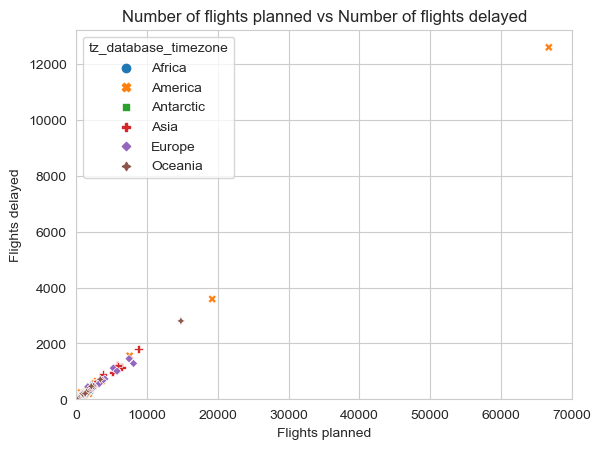

In [54]:
sns.set_style('whitegrid')
sns.scatterplot(data = flights, 
            x = 'Sum_flights_planned', 
            y = 'Sum_flights_delayed',
            hue = 'tz_database_timezone', 
            style = 'tz_database_timezone')
plt.title('Number of flights planned vs Number of flights delayed');
plt.xlabel('Flights planned')
plt.ylabel('Flights delayed')
plt.ylim(bottom = 0)
plt.xlim(left = 0);

## Exercise 5 - Geospatial data analysis (35 points) 🌍

Use the ‘*airports’*, ‘*routes’*, ’*countries*’ and ’*europe.geojson*’ files. Create an interactive map representation - related to European countries only - such that, when a country is selected the map shows the number of flights left from the country selected and directed to each of the other countries, if flights with those destinations exist. The information should be represented as a choropleth map, essentially dynamically creating it when a country is selected.

**Hints**:
1. If `A` is a GeoDataFrame and `B` a DataFrame, the result of `A.merge(B,..)` is a GeoDataFrame, whereas the result of `B.merge(A,..)` is a DataFrame. The function `to_json()` on a DataFrame with a geometry column does **not** work.
2. When updating the map, to access the color mapper you can use the following method:
```
color_mapper = p.select_one(LinearColorMapper)
```
where `p` is the figure.

3. You can discard Guernsey and Gibraltar that are not present in the geojson.


<aside>
💡 Note that you have all the information you need in the files mentioned above. 
</aside>

We take the cleaned airports dataset from Exercise 4 and we extract only countries in Europe

In [55]:
airports.loc[airports['tz_database_timezone'].str.contains('United_States'), 'tz_database_timezone'] = 'America'
airports.columns = airports.columns.str.strip()
europe_airports = airports.loc[airports['tz_database_timezone'].isin(['Europe'])]
europe_airports = europe_airports[['city', 'country', 'IATA']]
europe_airports

city        country IATA
10       Akureyri        Iceland  AEY
11    Egilsstadir        Iceland  EGS
12           Hofn        Iceland  HFN
13        Husavik        Iceland  HZK
14     Isafjordur        Iceland  IFJ
...           ...            ...  ...
6564        Bursa         Turkey  BTZ
6570     Columbus  United States  TZR
6655        Cizre         Turkey  NKT
6749         Eysk         Russia  EIK
6806        Magas         Russia  IGT

[986 rows x 3 columns]

We load other datasets (countries, routes, europe) and we plot europe to see if the geometry is correct

In [56]:
europe_geometry = gpd.read_file('europe.geojson')
europe_geometry = europe_geometry[['geometry', 'NAME', 'ISO3']]
europe_geometry_json = europe_geometry.to_json()
europe_geometry_json

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"NAME": "Azerbaijan", "ISO3": "AZE"}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[45.083321, 39.768044000000145], [45.266388, 39.61110700000012], [45.319984, 39.546944], [45.326096, 39.538322], [45.330826000000116, 39.535271], [45.457497, 39.49360700000011], [45.47248100000013, 39.494431], [45.49694, 39.502213], [45.507767, 39.506653], [45.5283280000001, 39.517212], [45.558327, 39.53387500000014], [45.59054600000013, 39.54861], [45.60777, 39.554703], [45.626656, 39.55999], [45.725266, 39.57972], [45.732201000000146, 39.580544000000145], [45.740822, 39.57972], [45.755272, 39.576653], [45.783333, 39.56915300000014], [45.80054500000011, 39.561928], [45.811371, 39.55637400000012], [45.81998, 39.54972], [45.823044, 39.545273], [45.829987, 39.455544], [45.829987, 39.449425], [45.829163, 39.442757], [45.826653, 39.43748], [45.8555530000001, 39.348038], [45.97804300000013, 39.27998400000013], 

In [57]:
p = figure(title = 'Europe',
              frame_height = 600 ,
                frame_width = 600,
                toolbar_location = 'right',
                tools = "pan, wheel_zoom, box_zoom, reset")
plotted_europe = p.patches('xs','ys', source = GeoJSONDataSource(geojson = europe_geometry_json),
                     line_color = 'black',
                     line_width = 0.25)
p.add_tools(HoverTool(renderers = [plotted_europe],
                      tooltips = [('Paese','@NAME')]))
show(p)

In [58]:
routes = pd.read_csv('routes.csv', delimiter = ';')
routes.columns = routes.columns.str.strip()
routes = routes[['source_airport', 'destination_airport']]
routes

source_airport destination_airport
0                AER                 KZN
1                ASF                 KZN
2                ASF                 MRV
3                CEK                 KZN
4                CEK                 OVB
...              ...                 ...
67658            WYA                 ADL
67659            DME                 FRU
67660            FRU                 DME
67661            FRU                 OSS
67662            OSS                 FRU

[67663 rows x 2 columns]

In [59]:
countries = pd.read_csv('countries.csv', delimiter = ',')
european_countries = countries.loc[countries['continent'].isin(['eu'])].replace(to_replace = 'eu', value = 'Europe')
european_countries = european_countries[['name', 'ISO alpha 3']]
european_countries

name ISO alpha 3
0                  Ukraine         UKR
1                   France         FRA
2                    Spain         ESP
3                   Sweden         SWE
4                  Germany         DEU
5                  Finland         FIN
6                   Norway         NOR
7                   Poland         POL
8                    Italy         ITA
9           United Kingdom         GBR
10                 Romania         ROU
11                 Belarus         BLR
12                  Greece         GRC
13                Bulgaria         BGR
14                 Iceland         ISL
15                Portugal         PRT
16          Czech Republic         CZE
17                 Denmark         DNK
18                 Hungary         HUN
19                  Serbia         SRB
20                 Austria         AUT
21                 Ireland         IRL
22               Lithuania         LTU
23                  Latvia         LVA
24                 Croatia         HRV
25  Bosnia and Herzegovina         BIH
26                Slovakia         SVK
27                 Estonia         EST
28             Netherlands         NLD
29             Switzerland         CHE
30                 Moldova         MDA
31                 Belgium         BEL
32                 Albania         ALB
33               Macedonia         MKD
34                Slovenia         SVN
35              Montenegro         MNE
37              Luxembourg         LUX
38               Faroe Is.         FRO
39                 Andorra         AND
40                   Malta         MLT
41           Liechtenstein         LIE
42                Guernsey         GGY
43              San Marino         SMR
44               Gibraltar         GIB
45                  Monaco         MCO
46            Vatican City         VAT

Everything works, so we can perform merges between the different datasets; we merge all csvs together, and then we merge that aggregated csv file into the geojson one so that we have a file suitable for plotting geometry; after merging we plot a choropleth map 

In [60]:
europe_airports_countries = europe_airports.merge(european_countries, left_on = 'country', right_on = 'name', how = 'left')
europe_airports_countries

city        country IATA     name ISO alpha 3
0       Akureyri        Iceland  AEY  Iceland         ISL
1    Egilsstadir        Iceland  EGS  Iceland         ISL
2           Hofn        Iceland  HFN  Iceland         ISL
3        Husavik        Iceland  HZK  Iceland         ISL
4     Isafjordur        Iceland  IFJ  Iceland         ISL
..           ...            ...  ...      ...         ...
981        Bursa         Turkey  BTZ      NaN         NaN
982     Columbus  United States  TZR      NaN         NaN
983        Cizre         Turkey  NKT      NaN         NaN
984         Eysk         Russia  EIK      NaN         NaN
985        Magas         Russia  IGT      NaN         NaN

[986 rows x 5 columns]

In [61]:
europe_airports_countries_routes = europe_airports_countries.merge(routes, left_on = 'IATA', right_on = 'source_airport', how = 'left')
europe_airports_countries_routes

city        country IATA     name ISO alpha 3 source_airport  \
0         Akureyri        Iceland  AEY  Iceland         ISL            AEY   
1      Egilsstadir        Iceland  EGS  Iceland         ISL            EGS   
2             Hofn        Iceland  HFN  Iceland         ISL            NaN   
3          Husavik        Iceland  HZK  Iceland         ISL            NaN   
4       Isafjordur        Iceland  IFJ  Iceland         ISL            IFJ   
...            ...            ...  ...      ...         ...            ...   
20126        Bursa         Turkey  BTZ      NaN         NaN            NaN   
20127     Columbus  United States  TZR      NaN         NaN            NaN   
20128        Cizre         Turkey  NKT      NaN         NaN            NaN   
20129         Eysk         Russia  EIK      NaN         NaN            NaN   
20130        Magas         Russia  IGT      NaN         NaN            NaN   

      destination_airport  
0                     RKV  
1                     RKV  
2                     NaN  
3                     NaN  
4                     RKV  
...                   ...  
20126                 NaN  
20127                 NaN  
20128                 NaN  
20129                 NaN  
20130                 NaN  

[20131 rows x 7 columns]

In [62]:
europe_geometry_merged = europe_geometry.merge(europe_airports_countries_routes, left_on = 'ISO3', right_on = 'ISO alpha 3', how = 'left')
europe_geometry_merged

geometry  \
0      MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...   
1      POLYGON ((19.43621 41.02107, 19.45055 41.06000...   
2      POLYGON ((19.43621 41.02107, 19.45055 41.06000...   
3      POLYGON ((19.43621 41.02107, 19.45055 41.06000...   
4      POLYGON ((19.43621 41.02107, 19.45055 41.06000...   
...                                                  ...   
18260  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   
18261  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   
18262  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   
18263  POLYGON ((12.44509 41.90312, 12.45165 41.90799...   
18264  MULTIPOLYGON (((21.36335 55.28687, 21.39076 55...   

                          NAME ISO3      city  country IATA     name  \
0                   Azerbaijan  AZE       NaN      NaN  NaN      NaN   
1                      Albania  ALB    Tirana  Albania  TIA  Albania   
2                      Albania  ALB    Tirana  Albania  TIA  Albania   
3                      Albania  ALB    Tirana  Albania  TIA  Albania   
4                      Albania  ALB    Tirana  Albania  TIA  Albania   
...                        ...  ...       ...      ...  ...      ...   
18260                   Serbia  SRB  Pristina   Serbia  PRN   Serbia   
18261                   Serbia  SRB  Pristina   Serbia  PRN   Serbia   
18262                   Serbia  SRB  Pristina   Serbia  PRN   Serbia   
18263  Holy See (Vatican City)  VAT       NaN      NaN  NaN      NaN   
18264                   Russia  RUS       NaN      NaN  NaN      NaN   

      ISO alpha 3 source_airport destination_airport  
0             NaN            NaN                 NaN  
1             ALB            TIA                 ATH  
2             ALB            TIA                 BLQ  
3             ALB            TIA                 GOA  
4             ALB            TIA                 MXP  
...           ...            ...                 ...  
18260         SRB            PRN                 IST  
18261         SRB            PRN                 BSL  
18262         SRB            PRN                 GVA  
18263         NaN            NaN                 NaN  
18264         NaN            NaN                 NaN  

[18265 rows x 10 columns]

In [63]:
europe_geometry_merged.dropna(inplace = True)
europe_geometry_merged

geometry     NAME ISO3  \
1      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
2      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
3      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
4      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
5      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
...                                                  ...      ...  ...   
18258  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   
18259  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   
18260  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   
18261  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   
18262  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   

           city  country IATA     name ISO alpha 3 source_airport  \
1        Tirana  Albania  TIA  Albania         ALB            TIA   
2        Tirana  Albania  TIA  Albania         ALB            TIA   
3        Tirana  Albania  TIA  Albania         ALB            TIA   
4        Tirana  Albania  TIA  Albania         ALB            TIA   
5        Tirana  Albania  TIA  Albania         ALB            TIA   
...         ...      ...  ...      ...         ...            ...   
18258  Pristina   Serbia  PRN   Serbia         SRB            PRN   
18259  Pristina   Serbia  PRN   Serbia         SRB            PRN   
18260  Pristina   Serbia  PRN   Serbia         SRB            PRN   
18261  Pristina   Serbia  PRN   Serbia         SRB            PRN   
18262  Pristina   Serbia  PRN   Serbia         SRB            PRN   

      destination_airport  
1                     ATH  
2                     BLQ  
3                     GOA  
4                     MXP  
5                     PSA  
...                   ...  
18258                 CPH  
18259                 LGW  
18260                 IST  
18261                 BSL  
18262                 GVA  

[17891 rows x 10 columns]

In [64]:
europe_geometry_merged['destination_airport_in_Europe'] = europe_geometry_merged['destination_airport'].isin(europe_geometry_merged['IATA'])
print(europe_geometry_merged['destination_airport_in_Europe'].value_counts())
europe_geometry_merged[['geometry', 'NAME', 'ISO3', 'source_airport', 'destination_airport', 'destination_airport_in_Europe']]
europe_geometry_merged_ineurope = europe_geometry_merged.loc[europe_geometry_merged['destination_airport_in_Europe'] == True]
europe_geometry_merged_ineurope

True     13796
False     4095
Name: destination_airport_in_Europe, dtype: int64


geometry     NAME ISO3  \
1      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
2      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
3      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
4      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
5      POLYGON ((19.43621 41.02107, 19.45055 41.06000...  Albania  ALB   
...                                                  ...      ...  ...   
18256  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   
18258  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   
18259  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   
18261  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   
18262  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   Serbia  SRB   

           city  country IATA     name ISO alpha 3 source_airport  \
1        Tirana  Albania  TIA  Albania         ALB            TIA   
2        Tirana  Albania  TIA  Albania         ALB            TIA   
3        Tirana  Albania  TIA  Albania         ALB            TIA   
4        Tirana  Albania  TIA  Albania         ALB            TIA   
5        Tirana  Albania  TIA  Albania         ALB            TIA   
...         ...      ...  ...      ...         ...            ...   
18256  Pristina   Serbia  PRN   Serbia         SRB            PRN   
18258  Pristina   Serbia  PRN   Serbia         SRB            PRN   
18259  Pristina   Serbia  PRN   Serbia         SRB            PRN   
18261  Pristina   Serbia  PRN   Serbia         SRB            PRN   
18262  Pristina   Serbia  PRN   Serbia         SRB            PRN   

      destination_airport  destination_airport_in_Europe  
1                     ATH                           True  
2                     BLQ                           True  
3                     GOA                           True  
4                     MXP                           True  
5                     PSA                           True  
...                   ...                            ...  
18256                 ZAG                           True  
18258                 CPH                           True  
18259                 LGW                           True  
18261                 BSL                           True  
18262                 GVA                           True  

[13796 rows x 11 columns]

In [65]:
europe = europe_geometry_merged_ineurope[['NAME', 'geometry']].drop_duplicates()
europe_geometry_merged_ineurope_grouped = europe_geometry_merged_ineurope.groupby('NAME').size().reset_index(name = 'count')
europe_merged = europe.merge(europe_geometry_merged_ineurope_grouped, left_on = 'NAME', right_on = 'NAME', how = 'left')
europe_merged

NAME                                           geometry  \
0                  Albania  POLYGON ((19.43621 41.02107, 19.45055 41.06000...   
1   Bosnia and Herzegovina  POLYGON ((17.64984 42.88908, 17.57853 42.94382...   
2                 Bulgaria  POLYGON ((27.87917 42.84110, 27.89500 42.80250...   
3                  Denmark  MULTIPOLYGON (((11.51389 54.82972, 11.56444 54...   
4                  Ireland  MULTIPOLYGON (((-9.65639 53.22222, -9.66333 53...   
5                  Estonia  MULTIPOLYGON (((23.99083 58.10000, 23.97805 58...   
6                  Austria  POLYGON ((13.83361 48.77361, 13.85806 48.77055...   
7           Czech Republic  POLYGON ((14.70028 48.58138, 14.65639 48.60750...   
8                  Finland  MULTIPOLYGON (((23.70583 59.92722, 23.64944 59...   
9                   France  MULTIPOLYGON (((9.48583 42.61527, 9.49472 42.6...   
10                 Germany  MULTIPOLYGON (((8.71026 47.69681, 8.67859 47.6...   
11                  Greece  MULTIPOLYGON (((24.12861 34.85667, 24.12861 34...   
12                 Croatia  MULTIPOLYGON (((16.90389 42.72611, 16.89444 42...   
13                 Hungary  POLYGON ((18.81702 45.91296, 18.80750 45.90277...   
14                 Iceland  POLYGON ((-15.07084 66.14360, -15.14222 66.138...   
15                   Italy  MULTIPOLYGON (((12.12778 47.00166, 12.13611 46...   
16                  Latvia  POLYGON ((21.06861 56.43555, 21.05777 56.51055...   
17                 Belarus  POLYGON ((26.61321 55.67484, 26.61999 55.68360...   
18               Lithuania  MULTIPOLYGON (((21.04444 55.32639, 20.98481 55...   
19                Slovakia  POLYGON ((17.25166 48.02499, 17.24171 48.02555...   
20               Macedonia  POLYGON ((20.82111 40.90888, 20.81194 40.90111...   
21                   Malta  MULTIPOLYGON (((14.56222 35.82027, 14.51972 35...   
22                 Belgium  POLYGON ((4.30237 51.26318, 4.30968 51.26203, ...   
23              Luxembourg  POLYGON ((6.02626 50.18125, 6.02861 50.16611, ...   
24              Montenegro  POLYGON ((18.45556 42.56583, 18.46389 42.56944...   
25             Netherlands  MULTIPOLYGON (((3.76417 51.34528, 3.86194 51.3...   
26                  Norway  MULTIPOLYGON (((8.74361 58.40972, 8.73194 58.4...   
27                  Poland  POLYGON ((18.85125 49.51736, 18.85222 49.52777...   
28                Portugal  POLYGON ((-8.20472 41.87472, -8.20112 41.87250...   
29                 Romania  POLYGON ((20.72696 46.17556, 20.72000 46.18749...   
30                 Moldova  POLYGON ((28.11972 46.85440, 28.11583 46.88777...   
31                Slovenia  POLYGON ((13.71866 46.52661, 13.77611 46.51833...   
32                   Spain  MULTIPOLYGON (((-2.92528 35.26666, -2.93694 35...   
33                  Sweden  MULTIPOLYGON (((16.83667 56.82694, 16.82805 56...   
34             Switzerland  POLYGON ((7.69722 47.54333, 7.76972 47.55333, ...   
35          United Kingdom  MULTIPOLYGON (((-6.29083 49.91222, -6.31139 49...   
36                 Ukraine  MULTIPOLYGON (((33.04028 46.01138, 33.00832 46...   
37                  Serbia  POLYGON ((20.07142 42.56091, 20.10583 42.64278...   

    count  
0      34  
1      18  
2      73  
3     263  
4     229  
5      37  
6     289  
7     150  
8     183  
9    1366  
10   1620  
11    720  
12    200  
13     87  
14     41  
15   1525  
16     80  
17     27  
18     72  
19     26  
20     20  
21     96  
22    279  
23     59  
24     19  
25    360  
26    613  
27    338  
28    456  
29    156  
30     25  
31     29  
32   1643  
33    432  
34    291  
35   1739  
36    110  
37     91

In [66]:
europe_merged_json = europe_merged.to_json()
geo_ds_ineurope = GeoJSONDataSource(geojson = europe_merged_json)
palette = Reds256
palette = palette[::-1]
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 2000)
color_bar = ColorBar(color_mapper = color_mapper, 
                     width = 20, height = 500,
                     label_standoff = 8,
                     location = (0,0))
e = figure(title = 'Flights per country',
                frame_height = 600 ,
                frame_width = 600,
                toolbar_location = 'right',
                tools = "pan, wheel_zoom, box_zoom, reset")
e.xgrid.grid_line_color = None
e.ygrid.grid_line_color = None
e.axis.visible = False
plotted_europe = e.patches('xs','ys', source = geo_ds_ineurope,
                     fill_color = {'field': 'count', 'transform': color_mapper},
                     line_color = 'grey',
                     line_width = 0.25,
                     fill_alpha = 0.7)
e.add_tools(HoverTool(renderers = [plotted_europe],
                      tooltips = [('Country','@NAME'), ('Number of flights', '@count')]))
e.add_layout(color_bar, 'right')
show(e)

## Datasets description

### **Used Cars**

Please find the dataset in the datasets folder.

This dataset is scraped from Ebay. The content of the dataset is in German, but it should not impose critical issues in understanding the data. The fields included in the dataset are as following:

**dateCrawled**: when this ad was first crawled, all field-values are taken from this date\
**name**: ”name” of the car\
**seller**: private or dealer\
**offerTypeprice**: the price in euro on the ad to sell the car\
**abtestvehicleTypeyearOfRegistration** : at which year the car was first registered\
**gearboxpowerPS**: power of the car in PS\
**modelkilometer**: how many kilometers the car has driven\
**monthOfRegistration**: at which month the car was first registered\
**fuelType**: vehicle fuel type\
**brand**: vehicle brand\
**notRepairedDamage**: if the car has a damage which is not repaired yet\
**dateCreated**: the date for which the ad at ebay was created\
**nrOfPictures**: number of pictures in the ad\
**postalCodelastSeenOnline**: when the crawler saw this ad last online

### **Airports, Routes and Ariports Delays**

Please find the datasets in the datasets folder.

The datasets used in this section can be found in the datasets folder.
Datasets description are as follows.

### **Airports**

As of January 2017, the OpenFlights Airports Database contains over 10,000 airports, train stations and ferry terminals spanning the globe, as shown in the map above. Each entry contains the following information:

**Airport ID**: Unique OpenFlights identifier for this airport\
**Name**: Name of airport. May or may not contain the City name\
**City**: Main city served by airport. May be spelled differently from Name\
**Country**: Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes\
**IATA**: 3-letter IATA code. Null if not assigned/unknown\
**ICAO**: 4-letter ICAO code. Null if not assigned/unknown\
**Latitude**: Decimal degrees, usually to six significant digits. Negative is South, positive is North\
**Longitude**: Decimal degrees, usually to six significant digits. Negative is West, positive is East\
**Altitude**: In feet\
**Timezone**: Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5\
**DST**: Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown)\
**Tz database time zone**: Timezone in "tz" (Olson) format, eg. "America/Los_Angeles"\
**Type**: Type of the airport. Value "airport" for air terminals\
**Source**: Source of the data. "OurAirports" for data sourced from OurAirports

### **Airports Delays**
**Airport ID**: Unique OpenFlights identifier for this airport\
**Name**: Name of airport. May or may not contain the City name\
**City**: Main city served by airport. May be spelled differently from Name\
**Country**: Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes\
**IATA**: 3-letter IATA code. Null if not assigned/unknown\
**ICAO**: 4-letter ICAO code. Null if not assigned/unknown\
**Latitude**: Decimal degrees, usually to six significant digits. Negative is South, positive is North\
**Longitude**: Decimal degrees, usually to six significant digits. Negative is West, positive is East\
**Altitude**: In feet\
**Timezone**: Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5\
**DST**: Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown)\
**Tz database time zone**: Timezone in "tz" (Olson) format, eg. "America/Los_Angeles"\
**Type**: Type of the airport. Value "airport" for air terminals\
**Source**: Source of the data. "OurAirports" for data sourced from OurAirports\
**Flights planned**: The number of fligths the related airport planned\
**Flights cancelled**: The number of flights cancelled\
**Flights delayed**: The number of flights delayed\
**Delay duration**: The delay duration (in minutes)


### **Routes**

As of June 2014, the OpenFlights/Airline Route Mapper Route Database contains 67663 routes between 3321 airports on 548 airlines spanning the globe, as shown in the map above. Each entry contains the following information:

**Airline**: 2-letter (IATA) or 3-letter (ICAO) code of the airline\
**Airline ID**: Unique OpenFlights identifier for airline (see Airline)\
**Source airport**: 3-letter (IATA) or 4-letter (ICAO) code of the source airport\
**Source airport ID**: Unique OpenFlights identifier for source airport (see Airport)\
**Destination airport**: 3-letter (IATA) or 4-letter (ICAO) code of the destination airport\
**Destination airport ID**: Unique OpenFlights identifier for destination airport (see Airport)\
**Codeshare**: "Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise\
**Stops**: Number of stops on this flight ("0" for direct)\
**Equipment**: 3-letter codes for plane type(s) generally used on this flight, separated by spaces\
The data is UTF-8 encoded. The special value \N is used for "NULL" to indicate that no value is available, and is understood automatically by MySQL if imported


<aside>
💡 Notes:

- Routes are directional: if an airline operates services from A to B and from B to A, both A-B and B-A are listed separately.
- Routes where one carrier operates both its own and codeshare flights are listed only once.
</aside>


### **Countries**

Please find the dataset in the datasets folder.

This dataset contains the information related to European countries.
